<h1> Malaria Forecasting. Regional, real weather</h1>

In [3]:
from __future__ import division
from ml_support import *

%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


<h1> Load in the data processed in Predicting_malaria_region_setup </h1>

In [11]:
DF = pd.read_csv('Malaria_regional_monthly_weather.csv', index_col=0)

In [13]:
DF.head()

Indicator_id       val   Region  \
0                           Email or internet access  1.000000  harreri   
1  Facility connected to the central power supply...  8.000000  harreri   
2                                Land line telephone  7.000000  harreri   
3                                       hmis_c_1_3_1  0.022865  harreri   
4                                       hmis_c_1_3_1  0.165079  harreri   

                                           Indicator  RegionLat  RegionLon  \
0                           Email or internet access    9.28966  42.172526   
1  Facility connected to the central power supply...    9.28966  42.172526   
2                                Land line telephone    9.28966  42.172526   
3  Proportion of households' access to latrine fa...    9.28966  42.172526   
4  Proportion of households' access to latrine fa...    9.28966  42.172526   

   gen_cat  age_cat      E_Date  E_year   ...        MXSPD  GUST        MAX  \
0       -1       -1  2009-03-01    2009   ...     9.920690   NaN  88.234483   
1       -1       -1  2009-03-01    2009   ...     9.920690   NaN  88.234483   
2       -1       -1  2009-03-01    2009   ...     9.920690   NaN  88.234483   
3       -1       -1  2007-01-01    2007   ...    10.524138   NaN  90.955172   
4       -1       -1  2007-04-01    2007   ...     6.220000   NaN  84.514286   

         MIN      PRCP  SNDP       FRSHTT  ELEVATION    LAT     LON  
0  61.913793  0.008571   NaN   344.827586     1158.8  9.625  41.854  
1  61.913793  0.008571   NaN   344.827586     1158.8  9.625  41.854  
2  61.913793  0.008571   NaN   344.827586     1158.8  9.625  41.854  
3  67.675862  0.248519   NaN  3450.689655     1158.8  9.625  41.854  
4  58.914286  0.000000   NaN     0.000000     1158.8  9.625  41.854  

[5 rows x 43 columns]

In [18]:
DF.columns

Index([u'Indicator_id', u'val', u'Region', u'Indicator', u'RegionLat',
       u'RegionLon', u'gen_cat', u'age_cat', u'E_Date', u'E_year', u'E_month',
       u'month', u'year', u'capital', u'pop', u'density', u'ave_temp',
       u'ave_prec_mm', u'elevation_m', u'infection_rate', u'is_capital',
       u'net_frac', u'STN', u'STN_dist_km', u'YEAR_MONTH', u'WBAN',
       u'YEARMODA', u'TEMP', u'DEWP', u'SLP', u'STP', u'VISIB', u'WDSP',
       u'MXSPD', u'GUST', u'MAX', u'MIN', u'PRCP', u'SNDP', u'FRSHTT',
       u'ELEVATION', u'LAT', u'LON'],
      dtype='object')

<h3> explore only one indicator </h3>

In [14]:
indicator = 'Number of slides or RDT positive for malaria'

In [40]:
<h3> why so many nan ?? </h3>

<h1> Plot temp </h1>

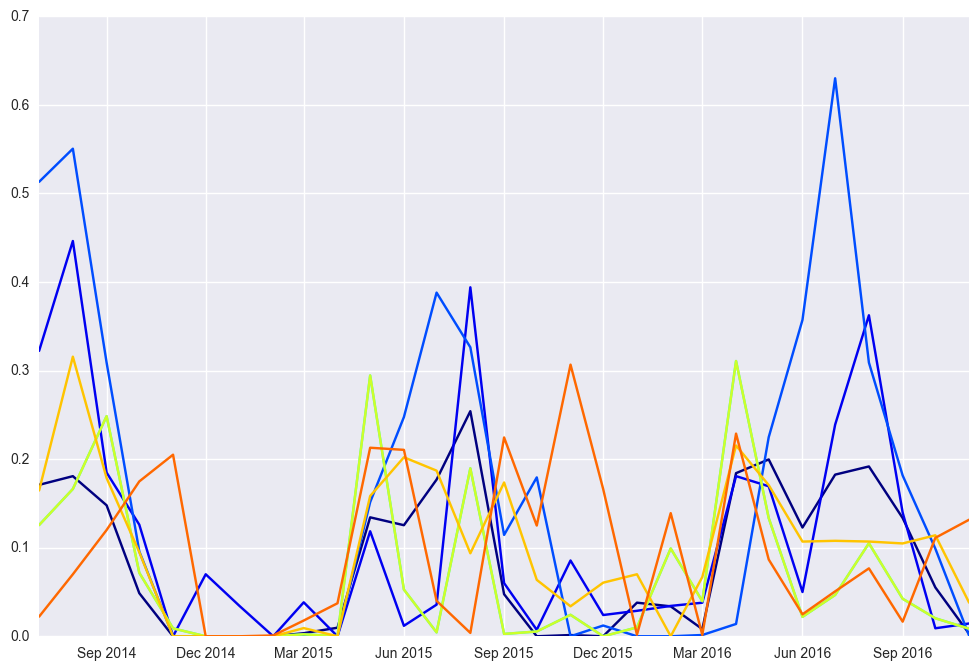

In [52]:
# Plot temp:
temp_series = DF.loc[DF['Indicator'] == indicator].groupby(['Region','YEAR_MONTH']).mean().PRCP

start,stop=0,1
number_of_colors= len(temp_series.index.levels[0])
cm_subsection = linspace(start, stop, number_of_colors) 
colors = [ cm.jet(x) for x in cm_subsection ]
    
for region, color in zip(temp_series.index.levels[0], colors):
    
    x = pd.to_datetime(temp_series[region].index)
    y = temp_series[region].values
    plot(x, y, color=color )

<h3> View Temperature distribution </h3>

15.0 32.0


(array([  5.,   7.,  12.,   4.,   5.,   8.,  15.,   9.,   9.,   2.,   9.,
         11.,   5.,   6.,   1.,   4.,   3.,   2.,   0.,   3.]),
 array([ 15.  ,  15.85,  16.7 ,  17.55,  18.4 ,  19.25,  20.1 ,  20.95,
         21.8 ,  22.65,  23.5 ,  24.35,  25.2 ,  26.05,  26.9 ,  27.75,
         28.6 ,  29.45,  30.3 ,  31.15,  32.  ]),
 <a list of 20 Patch objects>)

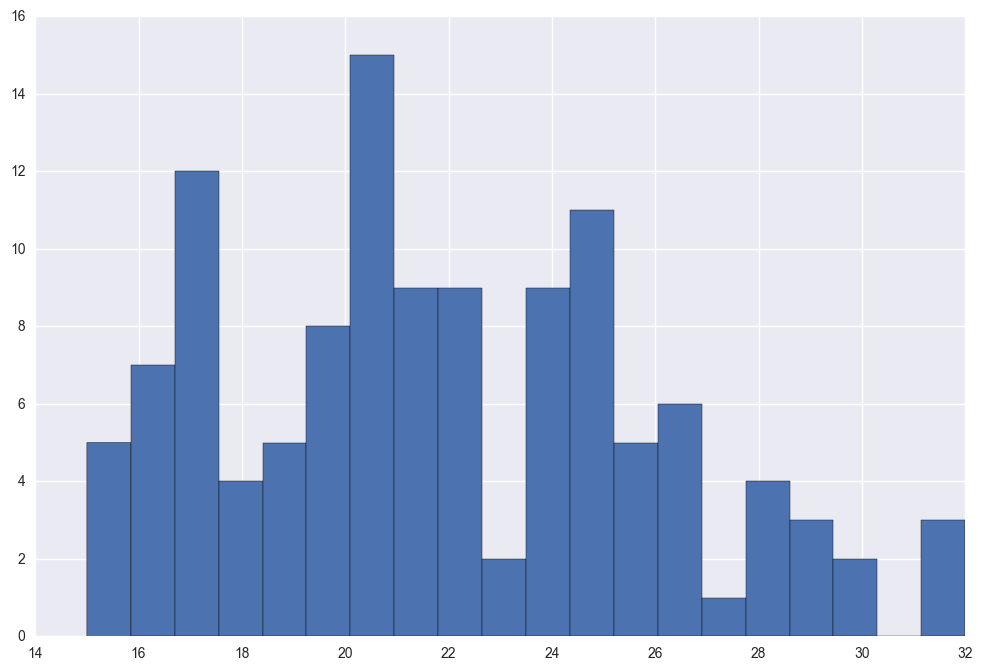

In [20]:
AA = DF_weather.drop('ANNUAL',1).replace(nan,0).reset_index()
AA = AA.loc[AA['Field'] == 'temp'].set_index('city').drop('Field',1)
all_data = [val for sub in AA.values for val in sub]
print min(all_data) , max(all_data)
plt.hist(all_data,20)

<h3> Precipitation distribution </h3>

0.0 434.0


(array([ 30.,  14.,  13.,  10.,   7.,   6.,   4.,   9.,   6.,   2.,   2.,
          2.,   2.,   2.,   3.,   2.,   2.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([   0.        ,   14.46666667,   28.93333333,   43.4       ,
          57.86666667,   72.33333333,   86.8       ,  101.26666667,
         115.73333333,  130.2       ,  144.66666667,  159.13333333,
         173.6       ,  188.06666667,  202.53333333,  217.        ,
         231.46666667,  245.93333333,  260.4       ,  274.86666667,
         289.33333333,  303.8       ,  318.26666667,  332.73333333,
         347.2       ,  361.66666667,  376.13333333,  390.6       ,
         405.06666667,  419.53333333,  434.        ]),
 <a list of 30 Patch objects>)

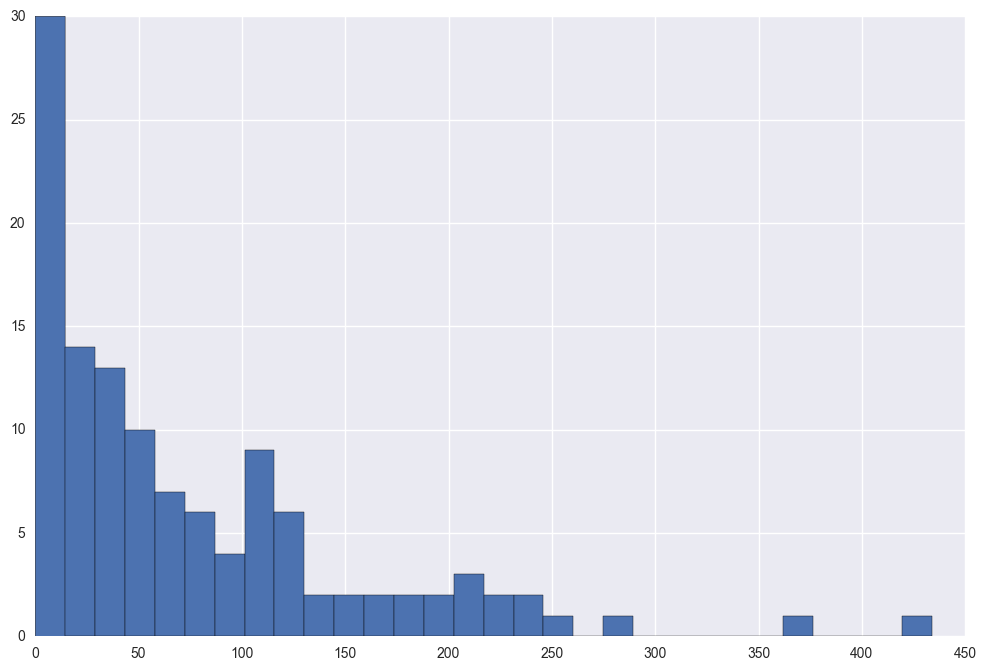

In [21]:
AA = DF_weather.drop('ANNUAL',1).replace(nan,0).reset_index()
AA = AA.loc[AA['Field'] == 'prec_mm'].set_index('city').drop('Field',1)
all_data = [val for sub in AA.values for val in sub]
print min(all_data) , max(all_data)
plt.hist(all_data,30)

<h1> Plotting code </h1>

In [358]:
def pd_proper_dateformat(series):
    '''Given a pandas time series return x, y with the time formatted to plot in matplotlib'''
    return series.index.astype(datetime.datetime), series.values

def frac_err(num, sig_num, den, sig_den):
    return sqrt( (sig_num / den) ** 2 + ((sig_den * num) / (den**2)) ** 2)

def pd_proper_dateformat(series):
    '''Given a pandas time series return x, y with the time formatted to plot in matplotlib'''
    return series.index.astype(datetime.datetime), series.values

def plot_date_indicator(dataframe, indicator, date_type='E_Date', ind2=None, val_name='val'):
    to_plot = dataframe.loc[dataframe['Indicator'] == indicator].reset_index().groupby(['Region', date_type])[val_name].sum()
    ylab_text = indicator    
    #If not none use indicator 2 as the denominator
    if ind2:
        to_plot /= dataframe.loc[dataframe['Indicator'] == ind2].reset_index().groupby(['Region', date_type])[val_name].sum()
        ylab_text = '%s per \n %s' % (indicator, ind2)
        
    start,stop=0,1
    number_of_colors= len(to_plot.index.levels[0])
    cm_subsection = linspace(start, stop, number_of_colors) 
    colors = [ cm.jet(x) for x in cm_subsection ]

    fig=figure()
    fig.set_size_inches(12, 8)
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})

    for level,color in zip(to_plot.index.levels[0],colors):
        x, y = pd_proper_dateformat(to_plot[level])
        plt.plot_date(x, y, '.-', color=color, markersize=20, label=level,)
    ylabel('malaria \n'.join(ylab_text.split('malaria')))
    xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
    #yscale('log')
    
    return to_plot

def plot_testing(dataframe, indicator, date_type='E_Date', val_name='val', pred_name = 'prediction', train_year = 2007, horz_line = (2007,1), logscale = False, show_leg = True, ylab=None ):
    to_plot = dataframe.loc[dataframe['Indicator'] == indicator].reset_index().groupby(['Region', date_type])[val_name].sum()
    ylab_text = indicator
    
    predict_plot = dataframe.loc[(dataframe['Indicator'] == indicator) & (dataframe['E_year'] > train_year)].reset_index().groupby(['Region', date_type])[pred_name].sum()
    pred_lab_text = pred_name
    #If not none use indicator 2 as the denominator
        
    start,stop=0,1
    number_of_colors= len(to_plot.index.levels[0])
    cm_subsection = linspace(start, stop, number_of_colors) 
    colors = [ cm.jet(x) for x in cm_subsection ]

    fig=figure()
    fig.set_size_inches(12, 8)
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})

    RMSE = []
    for level,color in zip(to_plot.index.levels[0],colors):
        x, y = pd_proper_dateformat(to_plot[level])
        xp, yp = pd_proper_dateformat(predict_plot[level])
        plt.plot_date(x, y, '.-', color=color, markersize=20, label=level,)
        plt.plot_date(xp, yp, '--', color=color, markersize=20, alpha = 0.9)
        
        RMSE.append( (level, sqrt( mean((predict_plot[level] - to_plot[level])**2) ) / mean(to_plot[level]) ) ) 
    
    if ylab:
        ylabel(ylab)
    else:
        ylabel(' malaria\n'.join(ylab_text.split('malaria')))
        
    #xlabel('Date')
    if show_leg:
        legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
    
    plt.plot_date(['%s-%s-01' % (horz_line), '%s-%s-01' % (horz_line)],[to_plot.min()*0.8, to_plot.max()*1.2],'-', color = 'k')
    
    if logscale:
        plt.yscale('log')
        
    return RMSE

def plot_forcasting(dataframe, df_predict, indicator, val_name='val', train_year = 2007, horz_line = (2007,1) , logscale = False, show_leg = True, ylab=None):
    to_plot = dataframe.loc[dataframe['Indicator'] == indicator].reset_index().groupby(['Region', 'E_Date'])[val_name].sum()
    ylab_text = indicator
    
    predict_plot = df_predict.loc[(df_predict['Indicator'] == indicator) & (df_predict['E_year'] > train_year)].reset_index().groupby(['Region', 'E_Date'])['val'].sum()
    pred_lab_text = 'prediction'
    #If not none use indicator 2 as the denominator
        
    start,stop=0,1
    number_of_colors= len(to_plot.index.levels[0])
    cm_subsection = linspace(start, stop, number_of_colors) 
    colors = [ cm.jet(x) for x in cm_subsection ]

    fig=figure()
    fig.set_size_inches(12, 8)
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})

    RMSE = []
    for level,color in zip(to_plot.index.levels[0],colors):
        x, y = pd_proper_dateformat(to_plot[level])
        xp, yp = pd_proper_dateformat(predict_plot[level])
        plt.plot_date(x, y, '.-', color=color, markersize=20, label=level,)
        plt.plot_date(xp, yp, '--', color=color, markersize=20, alpha = 0.9)
        
        RMSE.append( (level, sqrt( mean((predict_plot[level] - to_plot[level])**2) ) / mean(to_plot[level]) ) ) 
        
    if ylab:
        ylabel(' malaria\n'.join(ylab.split('malaria')))
    else:
        ylabel(' malaria\n'.join(ylab_text.split('malaria')))
        
    #xlabel('Date')
    if show_leg:
        legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
    
    plt.plot_date(['%s-%s-01' % horz_line, '%s-%s-01' % horz_line],[to_plot.min()*0.8, to_plot.max()*1.2],'-', color = 'k')
    
    if logscale:
        plt.yscale('log')
        
    return RMSE

def plot_testing_nation(dataframe, indicator, date_type='E_Date', val_name='val', pred_name = 'prediction', train_year = 2007, horz_line = (2007,1), ylab=None):
    to_plot = dataframe.loc[dataframe['Indicator'] == indicator].reset_index().groupby([date_type])[val_name].sum()
    ylab_text = indicator
    
    predict_plot = dataframe.loc[(dataframe['Indicator'] == indicator) & (dataframe['E_year'] > train_year)].reset_index().groupby([date_type])[pred_name].sum()
    pred_lab_text = pred_name
    #If not none use indicator 2 as the denominator

    fig=figure()
    fig.set_size_inches(12, 8)
    sns.set_context("notebook", font_scale=1.6, rc={"lines.linewidth": 2.5})

    plt.subplot2grid((4,1), (0,0), rowspan=3)
    x, y = pd_proper_dateformat(to_plot)
    xp, yp = pd_proper_dateformat(predict_plot)
    plt.plot_date(x, y, '.-', color='k', markersize=20, label='National Average',)
    plt.plot_date(xp, yp, '--', color='k', markersize=20, label='Prediction', alpha = 0.7)
        
    if ylab:
        ylabel(ylab)
    else:
        ylabel(ylab_text)
        
    #xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
    
    plt.plot_date(['%s-%s-01' % horz_line, '%s-%s-01' % horz_line],[to_plot.min()*0.8, to_plot.max()*1.2],'-', color = 'k')
    
    # Plot error 
    
    plt.subplot2grid((4,1), (3,0))
    
    #RMSE_n = mean(sqrt((predict_plot - to_plot)**2) / to_plot)
    RMSE_n = sqrt( mean((predict_plot - to_plot)**2) ) / mean(to_plot)
    x, y = pd_proper_dateformat( ((predict_plot - to_plot) * 100 / to_plot).replace(nan,0) )

    plt.plot_date(x, y, '.', color='k', markersize=20, label='percent error',)
    #legend(loc='upper right', numpoints=1,fontsize=12)
    #plt.text(max(x), max(y), 'Norm RMSE = %s' % RMSE_n *100)
    
    ylabel('Percent Error')
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))
    #xlabel('Date')
    
    return to_plot, predict_plot, RMSE_n
    

def plot_forcast_nation(dataframe, df_predict, indicator, val_name='val', train_year = 2007, res=True, ylab=None):
    to_plot = dataframe.loc[dataframe['Indicator'] == indicator].reset_index().groupby(['E_Date'])[val_name].sum()
    ylab_text = indicator
    
    predict_plot = df_predict.loc[(df_predict['Indicator'] == indicator) & (df_predict['E_year'] > train_year)].reset_index().groupby(['E_Date'])['val'].sum()
    pred_lab_text = 'prediction'
    #If not none use indicator 2 as the denominator

    fig=figure()
    fig.set_size_inches(12, 8)
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})

    if res:
        plt.subplot2grid((4,1), (0,0), rowspan=3)
    x, y = pd_proper_dateformat(to_plot)
    xp, yp = pd_proper_dateformat(predict_plot)
    plt.plot_date(x, y, '.-', color='k', markersize=20, label='National Average',)
    plt.plot_date(xp, yp, '--', color='k', markersize=20, label='Prediction', alpha = 0.7)
        
    if ylab:
        ylabel(ylab)
    else:
        ylabel(' malaria\n'.join(ylab_text.split('malaria')))
        
    #xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))
    
    plt.plot_date(['%s-01-01' % (train_year+1), '%s-01-01' % (train_year+1)],[to_plot.min(), to_plot.max()],'-', color = 'k')
    
    RMSE_n = sqrt( mean((predict_plot - to_plot)**2) ) / mean(to_plot)
    # Plot residual errors
    if res:
        plt.subplot2grid((4,1), (3,0))

        x, y = pd_proper_dateformat( ((predict_plot - to_plot) * 100 / to_plot).replace(nan,0) )

        plt.plot_date(x, y, '.', color='k', markersize=20, label='percent error',)
        #legend(loc='upper right', numpoints=1,fontsize=12)
        #plt.text(max(x), max(y), 'Norm RMSE = %s' % RMSE_n *100)

        ylabel('Percent Error')
        ax = gca()
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))
        xlabel('Date')
    
    return to_plot, predict_plot, RMSE_n
    
    
def plot_date_indicator_nation(dataframe, indicator, date_type='E_Date', val_name='val', ind2=None, plt_err=False, plt_mean=False, plt_mean_std=False, x_range=[0,-1], ylab=None):
    to_plot = dataframe.loc[dataframe['Indicator'] == indicator].reset_index().groupby([date_type])[val_name].sum()
    to_plot = to_plot[x_range[0]:x_range[1]]
    yn = to_plot.values
    sqrtNn = sqrt(yn)
    y_err = sqrtNn
    
    if ylab:
        ylab_text = ylab
    else:
        ylab_text = indicator

    #If not none use indicator 2 as the denominator
    if ind2:
        to_plot_d = dataframe.loc[dataframe['Indicator'] == ind2].reset_index().groupby([date_type])[val_name].sum()
        to_plot /= to_plot_d
        yt = to_plot_d.values
        sqrtNt = sqrt(yt)
        y_err = frac_err(yn, sqrtNn, yt, sqrtNt)
        #use binomial error
        p = to_plot.values
        y_err = sqrt( p*(1-p) / yt )
        ylab_text = '%s per \n %s' % (indicator, ind2)
    
    
    fig=figure()
    fig.set_size_inches(12, 8)
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
    x, y = pd_proper_dateformat(to_plot)
    y_mean = ones_like(y)*mean(y)
    y_mean_err = std(y) / sqrt(len(y))
    plt.plot_date(x, y, '.-', color='k', markersize=20, label='Nation',)
    
    if plt_err:
        plt.fill_between(x, y-y_err, y+y_err,
            alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
            linewidth=4, linestyle='dashdot', antialiased=True, label=r'1 $\sigma$')
        
    if plt_mean:
        plt.plot_date(x, y_mean, '-', color='k', markersize=20, label='Mean',)
    if plt_mean_std:    
        plt.fill_between(x, y_mean-y_mean_err, y_mean+y_mean_err,
        alpha=0.2, edgecolor='black', facecolor='grey',
        linewidth=4, linestyle='dashdot', antialiased=True)
    
    #x has to be in int to fit the data
    x_fit = to_plot.index.astype(int)
    fit = np.poly1d(np.polyfit(x_fit, y, 1))
    y_lin = fit(x_fit)
    plt.plot_date(x, y_lin,'-', color='r', label='Liner Fit',)
    
    ylabel(' malaria\n'.join(ylab_text.split('malaria')))
    #xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m\n%Y'))
    
    return to_plot


In [186]:
ind_names[3]

'Number of slides or RDT positive for malaria 5-14 years: Females'

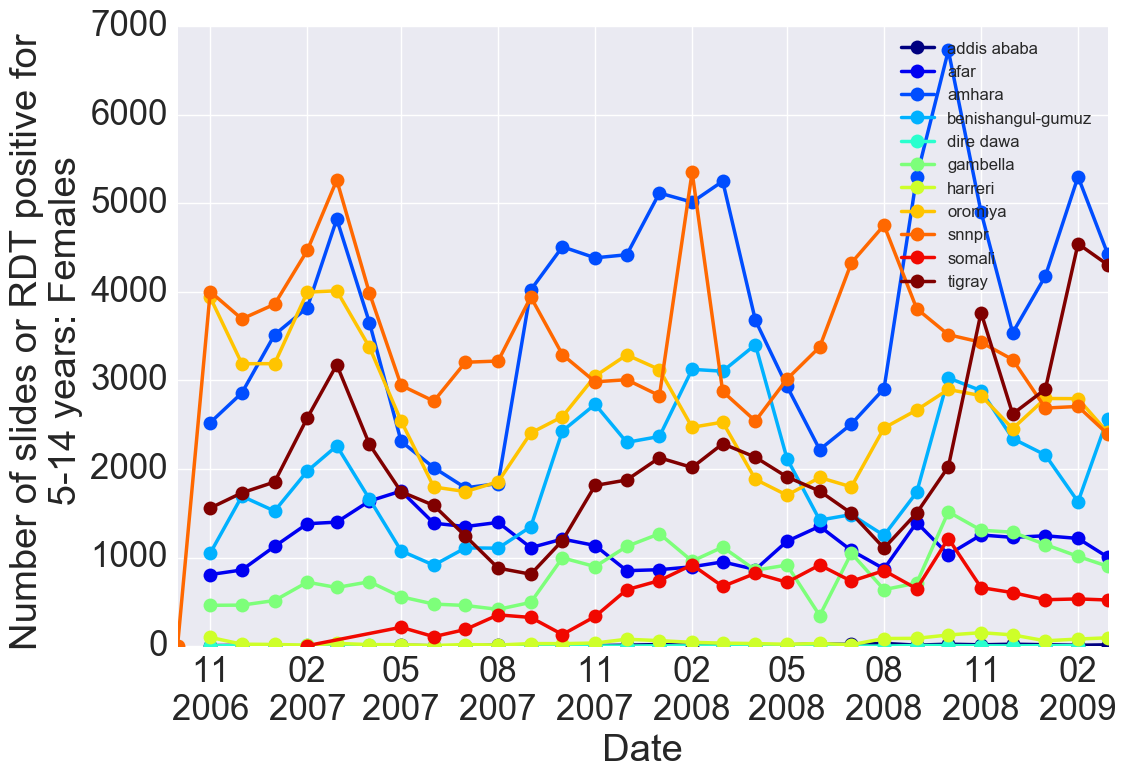

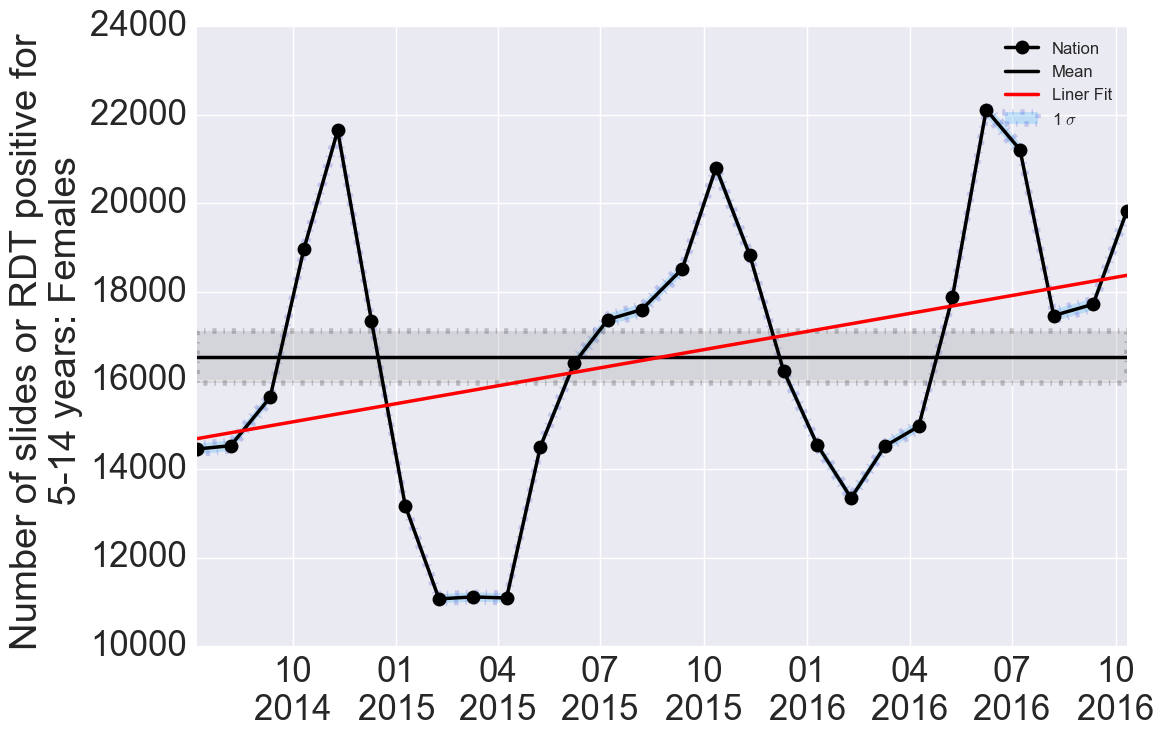

In [189]:
indicator = 'Number of slides or RDT positive for malaria'
indicator = ind_names[3]
series_d = plot_date_indicator(DF_ind, indicator)
series_d = plot_date_indicator_nation(DF_ind, indicator, date_type='Real_Date', plt_mean=True, plt_err=True, plt_mean_std=True, x_range=[1,-1])

In [28]:
range_cut = (DF_ind['E_year']>2006) & (DF_ind['E_year']<2009)
DF_pdf = DF_ind.loc[range_cut]
year_sum = DF_pdf.groupby(['E_year']).val.sum()

In [29]:
year_sum

E_year
2007    1.213063e+07
2008    2.200465e+07
Name: val, dtype: float64

<h1> Monthly malaria rate profile </h1>

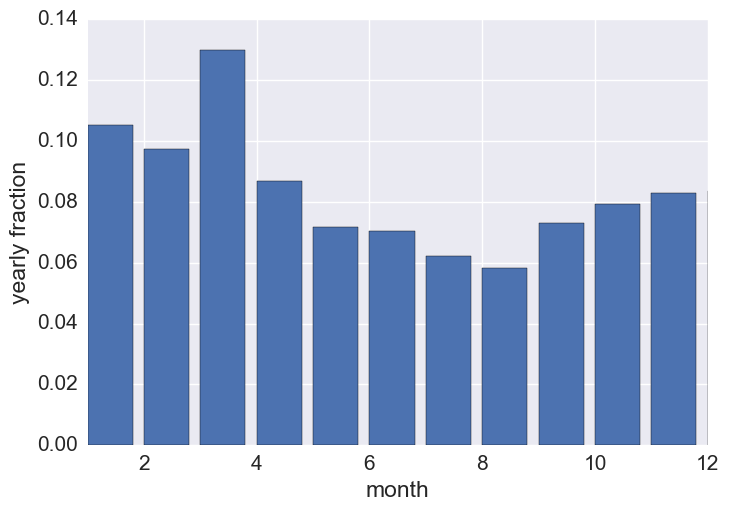

In [2341]:
indicator = 'Number of slides or RDT positive for malaria'
#can do M/F profile also
monthly = DF_ind.loc[DF_ind['Indicator'] == indicator].groupby('E_month').val.mean()
plt.bar(monthly.index, monthly.values/ sum(monthly.values))
xlim(1,12)
xlabel('month')
ylabel('yearly fraction')

<h1> Setup predictive model </h1>

<h1> For prediction only use certain indicator names in the data set </h1>

<h3> Here you use all dissaggregations of malaria count. <br> make this into two seperate notebooks </h3>

In [197]:
indicator = 'Number of slides or RDT positive for malaria'

# use this for malaria rate forecasting (need to update for gender)
indicator_cut = [indicator in ind_name for ind_name in DF_ind['Indicator']]

#use this for general forecasting
#indicator_cut = [ind_name in set(ind_names) for ind_name in DF_ind['Indicator']]

#build a new dataframe from the indicator cut on the original one
#DF_shift = pd.DataFrame(DF_ind.loc[DF_ind['Indicator'].isin set(ind_names)])

DF_shift = pd.DataFrame(DF_ind.loc[indicator_cut])

In [198]:
DF_shift.groupby('Indicator').count()

Indicator_id  val  Region  \
Indicator                                                                       
Number of slides or RDT positive for malaria                 314  314     314   
Number of slides or RDT positive for malaria 5-...           312  312     312   
Number of slides or RDT positive for malaria 5-...           313  313     313   
Number of slides or RDT positive for malaria < ...           308  308     308   
Number of slides or RDT positive for malaria < ...           309  309     309   
Number of slides or RDT positive for malaria >=...           315  315     315   
Number of slides or RDT positive for malaria >=...           315  315     315   

                                                    gen_cat  age_cat  E_Date  \
Indicator                                                                      
Number of slides or RDT positive for malaria            314      314     314   
Number of slides or RDT positive for malaria 5-...      312      312     312   
Number of slides or RDT positive for malaria 5-...      313      313     313   
Number of slides or RDT positive for malaria < ...      308      308     308   
Number of slides or RDT positive for malaria < ...      309      309     309   
Number of slides or RDT positive for malaria >=...      315      315     315   
Number of slides or RDT positive for malaria >=...      315      315     315   

                                                    E_year  E_month  month  \
Indicator                                                                    
Number of slides or RDT positive for malaria           314      314    314   
Number of slides or RDT positive for malaria 5-...     312      312    312   
Number of slides or RDT positive for malaria 5-...     313      313    313   
Number of slides or RDT positive for malaria < ...     308      308    308   
Number of slides or RDT positive for malaria < ...     309      309    309   
Number of slides or RDT positive for malaria >=...     315      315    315   
Number of slides or RDT positive for malaria >=...     315      315    315   

                                                    year    ...     \
Indicator                                                   ...      
Number of slides or RDT positive for malaria         314    ...      
Number of slides or RDT positive for malaria 5-...   312    ...      
Number of slides or RDT positive for malaria 5-...   313    ...      
Number of slides or RDT positive for malaria < ...   308    ...      
Number of slides or RDT positive for malaria < ...   309    ...      
Number of slides or RDT positive for malaria >=...   315    ...      
Number of slides or RDT positive for malaria >=...   315    ...      

                                                    elevation_m  \
Indicator                                                         
Number of slides or RDT positive for malaria                314   
Number of slides or RDT positive for malaria 5-...          312   
Number of slides or RDT positive for malaria 5-...          313   
Number of slides or RDT positive for malaria < ...          308   
Number of slides or RDT positive for malaria < ...          309   
Number of slides or RDT positive for malaria >=...          315   
Number of slides or RDT positive for malaria >=...          315   

                                                    infection_rate  \
Indicator                                                            
Number of slides or RDT positive for malaria                   314   
Number of slides or RDT positive for malaria 5-...             312   
Number of slides or RDT positive for malaria 5-...             313   
Number of slides or RDT positive for malaria < ...             308   
Number of slides or RDT positive for malaria < ...             309   
Number of slides or RDT positive for malaria >=...             315   
Number of slides or RDT positive for malaria >=...             315   

                                

<h1> add leading indicators </h1>

In [199]:
#DF_shift['val'] = DF_shift['val'] / DF_shift['val'].max()
DF_shift['val_shift_1'] = DF_shift.shift(1)['val']
#DF_shift['val_delta'] = (DF_shift['val'] - DF_shift['val_shift_1']) / DF_shift['val_shift_1']
DF_shift['infection_rate_shift_1'] = DF_shift.shift(1)['infection_rate']
DF_shift['temp_shift_1'] = DF_shift.shift(1)['temp']
DF_shift['temp_cat_shift_1'] = DF_shift.shift(1)['temp_cat']
DF_shift['prec_shift_1'] = DF_shift.shift(1)['prec_mm']
DF_shift['prec_cat_shift_1'] = DF_shift.shift(1)['prec_cat']
DF_shift['Region_shift_1'] = DF_shift.shift(1)['Region']
DF_shift['Ind_shift_1'] = DF_shift.shift(1)['Indicator']

#only makes sense when considering historical averages
DF_shift['temp_delta'] = DF_shift['temp'] - DF_shift['temp_shift_1']
DF_shift['prec_delta'] = DF_shift['prec_mm'] - DF_shift['prec_shift_1']

DF_shift['val_shift_2'] = DF_shift.shift(2)['val']
DF_shift['infection_rate_shift_2'] = DF_shift.shift(2)['infection_rate']
DF_shift['temp_shift_2'] = DF_shift.shift(2)['temp']
DF_shift['temp_cat_shift_2'] = DF_shift.shift(2)['temp_cat']
DF_shift['prec_shift_2'] = DF_shift.shift(2)['prec_mm']
DF_shift['prec_cat_shift_2'] = DF_shift.shift(2)['prec_cat']
DF_shift['Region_shift_2'] = DF_shift.shift(2)['Region']
DF_shift['Ind_shift_2'] = DF_shift.shift(2)['Indicator']

DF_shift['temp_delta_2'] = DF_shift['temp_shift_1'] - DF_shift['temp_shift_2']
DF_shift['prec_delta_2'] = DF_shift['prec_shift_1'] - DF_shift['prec_shift_2']

#val delta can not rely on the upcoming prediction. Only makes sense to go two back
DF_shift['val_delta'] = (DF_shift['val_shift_1'] - DF_shift['val_shift_2']) / DF_shift['val_shift_2']
DF_shift['infection_rate_delta'] = (DF_shift['infection_rate_shift_1'] - DF_shift['infection_rate_shift_2']) / DF_shift['infection_rate_shift_2']

<h1> log of indicators </h1>

In [200]:
DF_shift['log_val'] = np.log10(DF_shift['val']).replace(nan, 1/100)
DF_shift['log_val_delta'] = np.log10(DF_shift['val_delta']).replace(nan, 1/100).replace(-inf, 1/1000)
DF_shift['log_val_shift_1'] = np.log10(DF_shift['val_shift_1']).replace(nan, 1/100).replace(-inf, 1/1000)
DF_shift['log_val_shift_2'] = np.log10(DF_shift['val_shift_2']).replace(nan, 1/100).replace(-inf, 1/1000)

DF_shift['log_infection_rate'] = np.log10(DF_shift['infection_rate']).replace(nan, 1/100).replace(-inf, 1/1000)
DF_shift['log_infection_rate_shift_1'] = np.log10(DF_shift['infection_rate_shift_1']).replace(nan, 1/100).replace(-inf, 1/1000)

DF_shift['log_elevation_m'] = np.log10(DF_shift['elevation_m']).replace(nan, 1/100)
DF_shift['log_pop'] = np.log10(DF_shift['pop']).replace(nan, 1/100)
DF_shift['log_density'] = np.log10(DF_shift['density']).replace(nan, 1/100)

DF_shift['log_prec_mm'] = np.log10(DF_shift['prec_mm']).replace(nan, 1/100).replace(-inf, 1/1000)
DF_shift['log_prec_shift_1'] = np.log10(DF_shift['prec_shift_1']).replace(nan, 1/100).replace(-inf, 1/1000)
DF_shift['log_prec_shift_2'] = np.log10(DF_shift['prec_shift_2']).replace(nan, 1/100).replace(-inf, 1/1000)

DF_shift['log_prec_delta'] = np.log10(DF_shift['prec_delta']).replace(nan, 1/100).replace(-inf, 1/1000)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log10


<h3> clean up nan and region missmatch. Require the region and the indicator to be the same </h3>

In [201]:
DF_shift = DF_shift.loc[(DF_shift['Region'] == DF_shift['Region_shift_1']) &\
                      (DF_shift['Indicator'] == DF_shift['Ind_shift_1']) &\
                      (DF_shift['Region'] == DF_shift['Region_shift_2']) &\
                      (DF_shift['Indicator'] == DF_shift['Ind_shift_2']) ]


In [202]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.preprocessing import OneHotEncoder
#RF = RandomForestRegressor()
RF = GradientBoostingRegressor(learning_rate=.1, n_estimators=1000)


<h1> Model the infection rate (cases normalized to population) </h1>

<h3> Split the data set into training t <= 2007 and validation t > 2008 </h3>

In [204]:
#train on 2007 data
DF_training = pd.DataFrame(DF_shift.loc[DF_shift['E_year'] <= 2007])

#all data
#DF_training = DF_shift

In [205]:
# labels:
y = DF_training.infection_rate.values


features = ['pop', 'density', 'month', 'net_frac', 'elevation_m', 'temp', 'prec_mm', 'temp_delta', 'prec_delta', \
        'val_delta', 'gen_cat', 'age_cat', 'infection_rate_shift_1', 'infection_rate_shift_2', 'infection_rate_delta',\
        'val_shift_1', 'val_shift_2', 'temp_shift_1', 'prec_shift_1', 'temp_shift_2', 'prec_shift_2']


#log_features = ['log_pop','log_density','month', 'net_frac', 'log_elevation_m', 'temp', 'log_prec_mm', 'temp_delta',\
#            'log_prec_delta', 'log_val_delta', 'gen_cat', 'age_cat', \
#            'log_infection_rate_shift_1', 'log_val_shift_1', 'log_val_delta',\
#            'temp_shift_1', 'log_prec_shift_1','log_val_shift_2', 'temp_shift_2', 'log_prec_shift_2']

# features
x = DF_training[features].values

# Fitting
RF.fit(x,y)

#Make predictions beyond 2007 to compare with data in 2008
x_all = DF_shift[features].values
prediction = RF.predict(x_all)

DF_shift['prediction'] = prediction

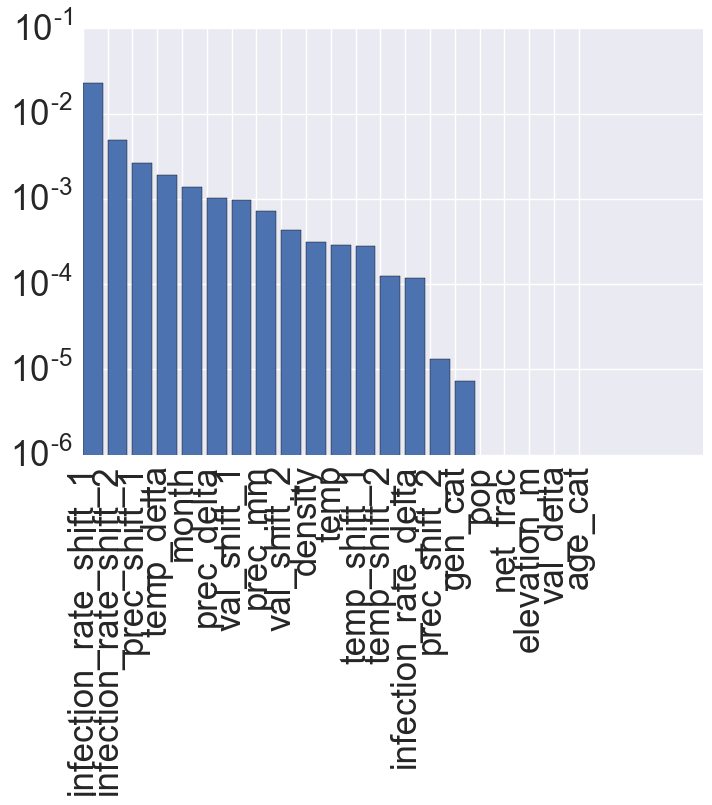

In [206]:
feature_imp = RF.feature_importances_
sorted_index = sorted(range(len(feature_imp)),key=lambda x:feature_imp[x], reverse=True)

x = range(len(feature_imp))
plt.bar(x, feature_imp[sorted_index])
xticks(x, [features[i] for i in sorted_index], rotation = 'vertical')
yscale('log')

In [516]:
indicator = 'Number of slides or RDT positive for malaria'
#series_d = plot_date_indicator(DF_ind, indicator, val_name='infection_rate')
#series_p = plot_date_indicator(DF_shift, indicator, val_name='prediction')

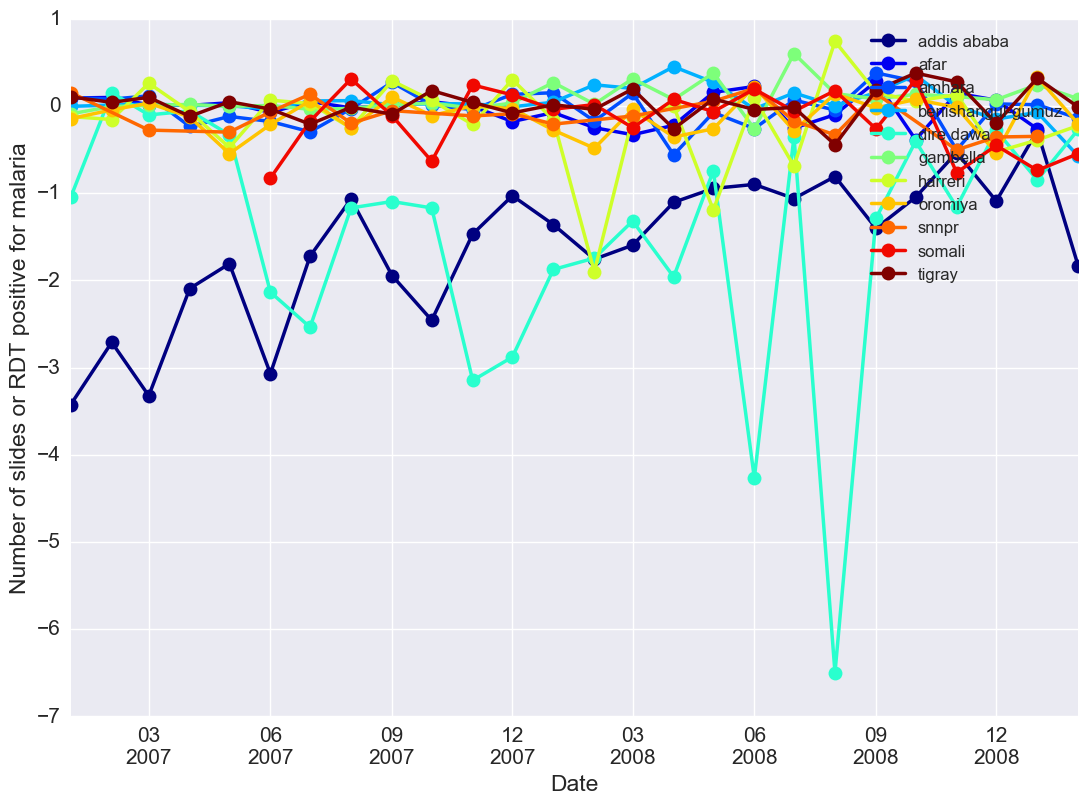

In [517]:
DF_shift['diff'] = DF_shift['infection_rate']-DF_shift['prediction']
DF_shift['norm_diff'] = (DF_shift['infection_rate']-DF_shift['prediction']) / DF_shift['infection_rate']
DF_shift['mse'] = (DF_shift['infection_rate']-DF_shift['prediction']) ** 2
series_d = plot_date_indicator(DF_shift, indicator, val_name='norm_diff')

In [518]:
sqrt(mean((DF_shift['infection_rate']-DF_shift['prediction'])**2))/mean(DF_shift['infection_rate'])

0.37011258249069373

In [519]:
sqrt(DF_shift.groupby('Region').mse.mean()) / DF_shift.groupby('Region').infection_rate.mean()*100

Region
addis ababa          143.292357
afar                  16.103528
amhara                21.993743
benishangul-gumuz     22.596199
dire dawa             95.982123
gambella              23.459365
harreri               46.479400
oromiya               22.097413
snnpr                 18.607743
somali                31.738881
tigray                18.118937
dtype: float64

<h1> plot forecast in 2008 with actual data</h1>

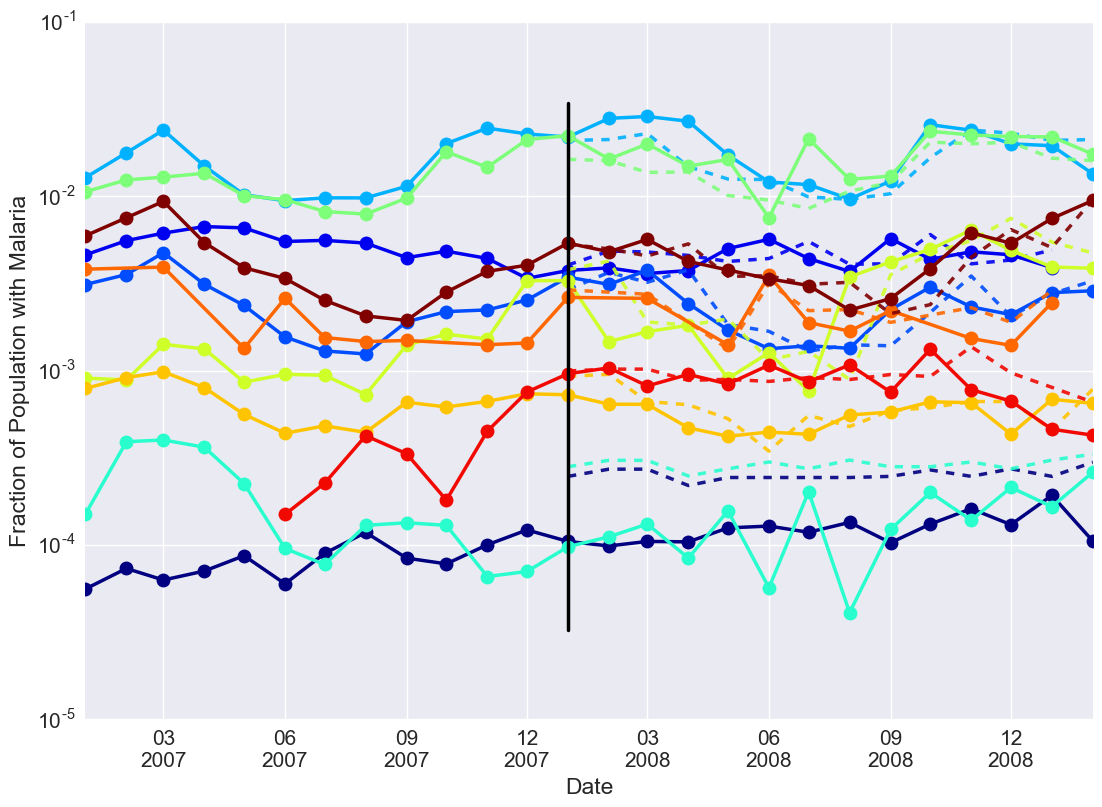

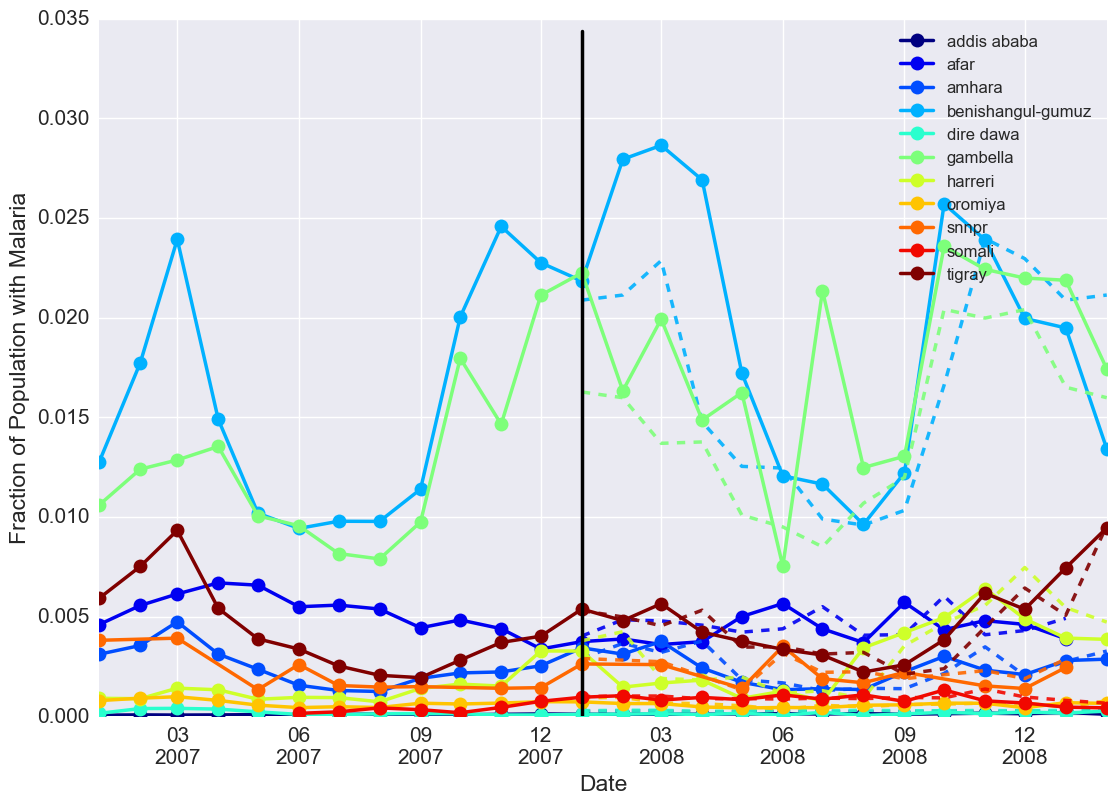

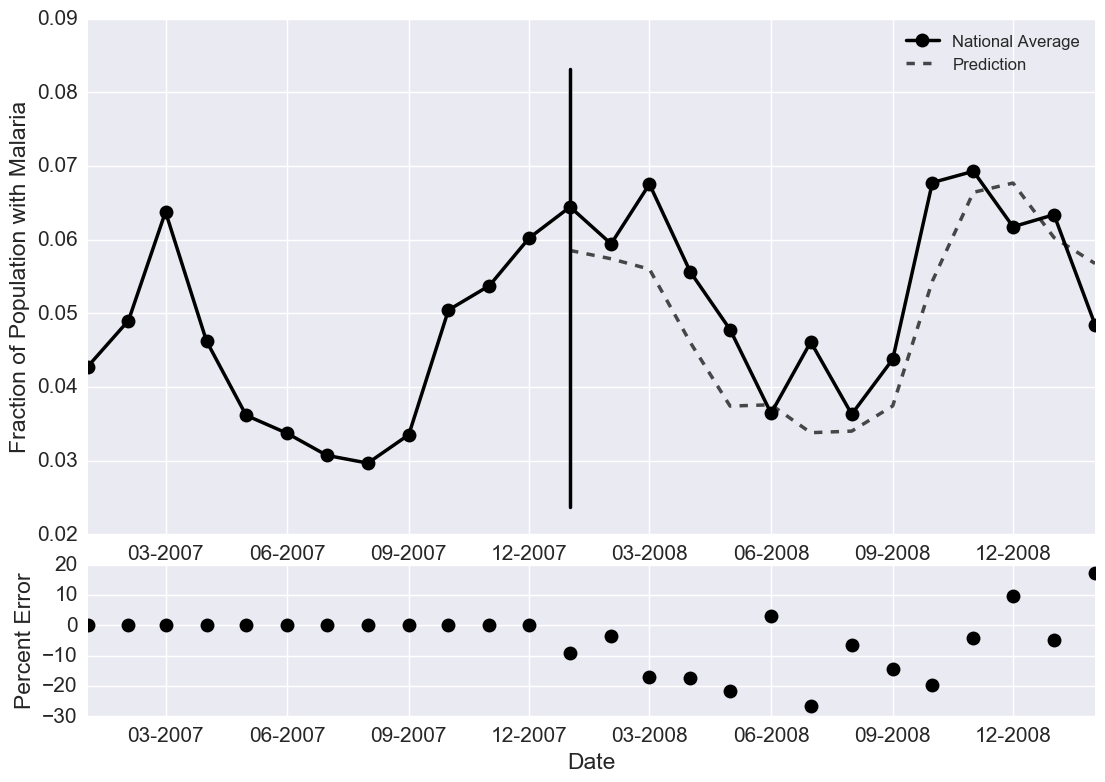

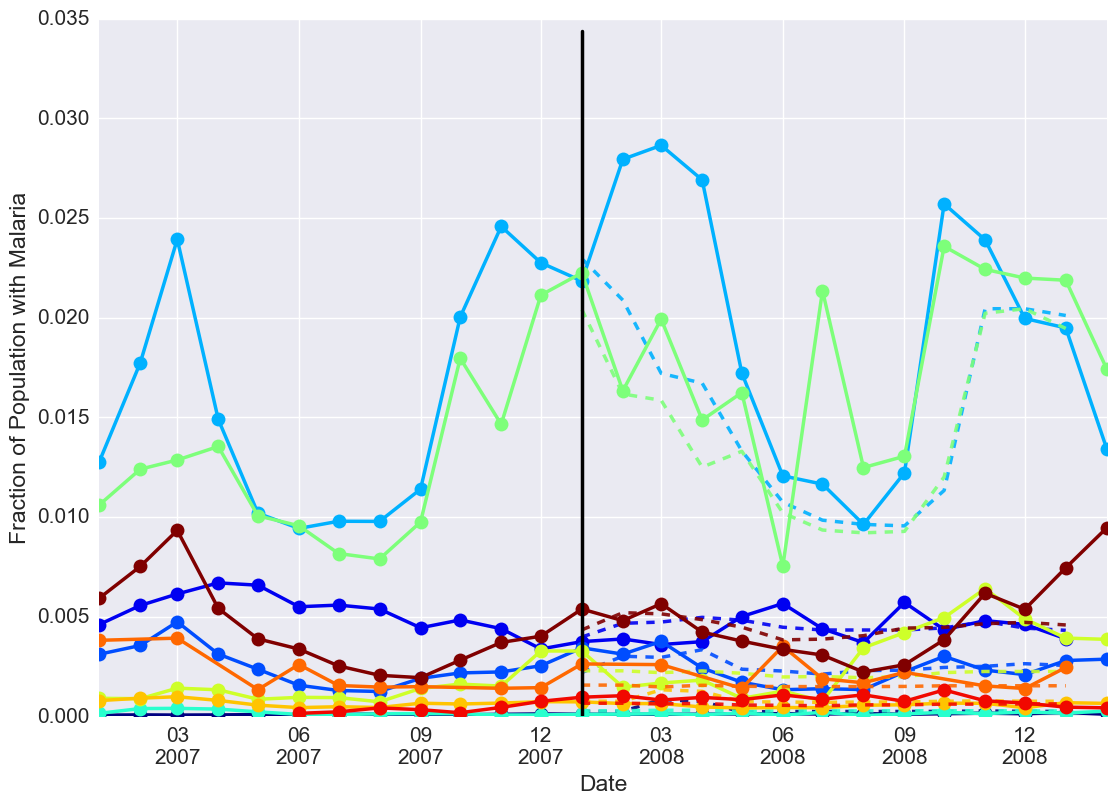

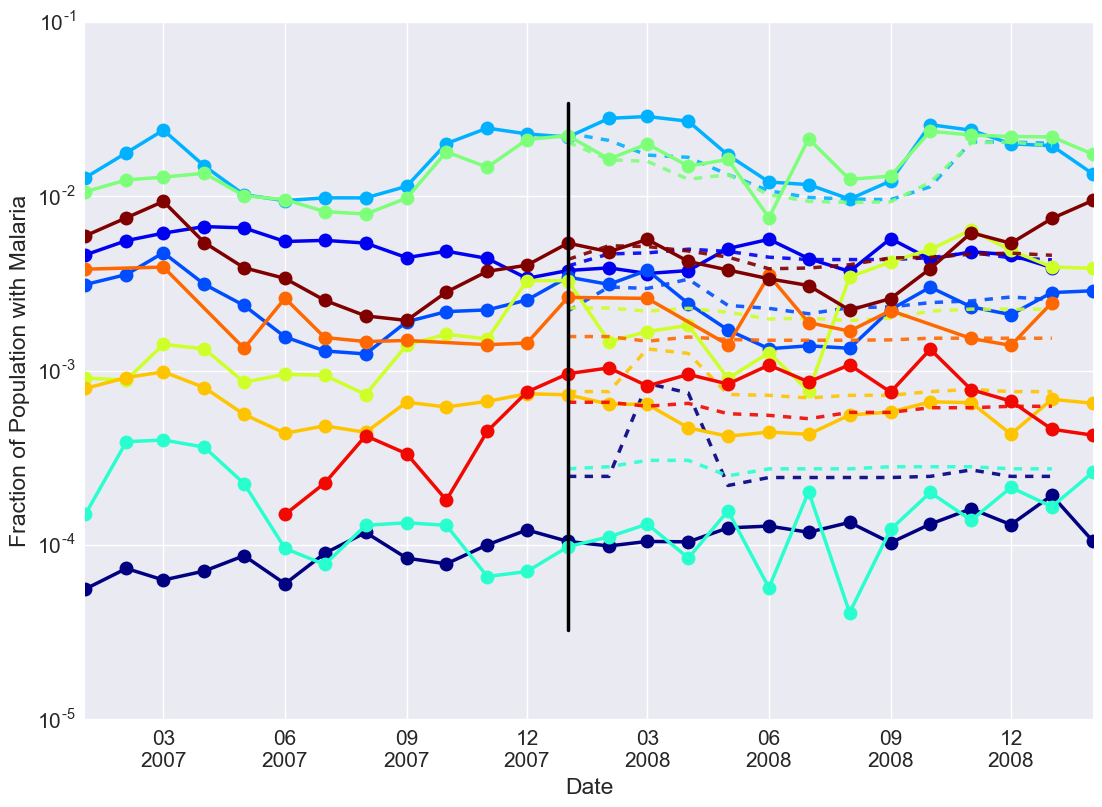

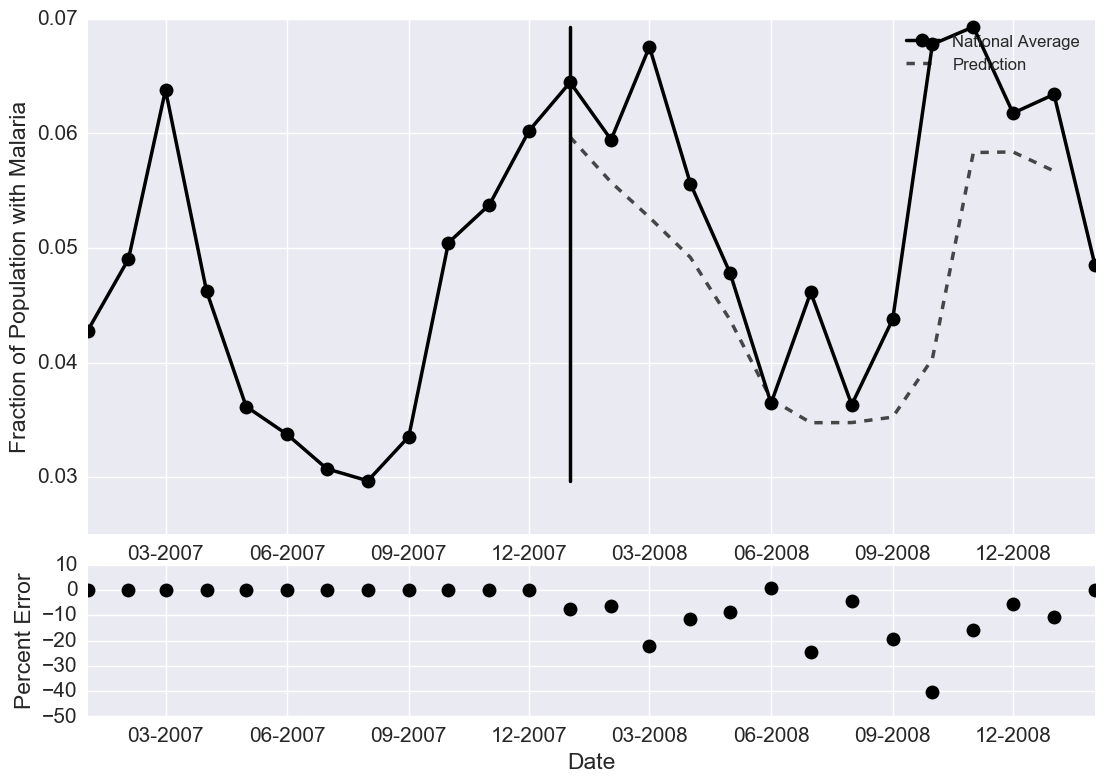

In [521]:
RMSE_zone = plot_testing(DF_shift, indicator, val_name='infection_rate', pred_name = 'prediction', train_year = 2007, logscale = True, show_leg=False, ylab='Fraction of Population with Malaria')
RMSE_zone = plot_testing(DF_shift, indicator, val_name='infection_rate', pred_name = 'prediction', train_year = 2007, logscale = False, ylab='Fraction of Population with Malaria')
to_plot, predict_plot, RMSE_n = plot_testing_nation(DF_shift, indicator, val_name='infection_rate', pred_name = 'prediction', train_year = 2007, ylab='Fraction of Population with Malaria')

# year long forecasting
ext_DF = forecast(DF_training, RF, n_months=12)
RMSE_zone_for = plot_forcasting(DF_shift, ext_DF, indicator, val_name='infection_rate', train_year = 2007, logscale = False, show_leg=False, ylab='Fraction of Population with Malaria')
RMSE_zone_for = plot_forcasting(DF_shift, ext_DF, indicator, val_name='infection_rate', train_year = 2007, logscale = True, show_leg=False, ylab='Fraction of Population with Malaria')
to_plot, predict_plot, RMSE_n_for = plot_forcast_nation(DF_shift, ext_DF, indicator, val_name='infection_rate', train_year = 2007, ylab='Fraction of Population with Malaria')


In [512]:
print RMSE_n
RMSE_zone

0.160079841079


[(u'addis ababa', 0.9470899410663336),
 (u'afar', 0.2106713201373584),
 (u'amhara', 0.2681847977036646),
 (u'benishangul-gumuz', 0.32156660857780839),
 (u'dire dawa', 0.70000975463353388),
 (u'gambella', 0.27443925264178171),
 (u'harreri', 0.592473393815516),
 (u'oromiya', 0.2856400370446458),
 (u'snnpr', 0.25967673164499794),
 (u'somali', 0.41393652823952309),
 (u'tigray', 0.24841747229596811)]

In [513]:
RMSE_n_for

0.16023354304700468

<h1> Train on all data and project one year </h1>

<h1> Predicting Malaria Count </h1>

In [237]:
RF = RandomForestRegressor()
#RF = GradientBoostingRegressor(learning_rate=.1, n_estimators=1000)

In [238]:
#train on 2007 data
DF_training = pd.DataFrame(DF_shift.loc[DF_shift['E_year'] <= 2007])

In [239]:
y = DF_training.val.values

features = ['pop','density','month', 'elevation_m', 'net_frac', 'temp', 'prec_mm', 'temp_delta', 'prec_delta', \
              'val_delta', 'val_shift_1', 'temp_shift_1', 'prec_shift_1', \
              'val_shift_2', 'temp_shift_2', 'prec_shift_2', 'gen_cat', 'age_cat']

#features_log = ['log_pop','log_density','month', 'net_frac', 'log_elevation_m', 'temp', 'log_prec_mm', 'temp_delta',\
#            'log_prec_delta', 'log_val_delta', 'gen_cat', 'age_cat', \
#            'log_infection_rate_shift_1', 'log_val_shift_1', 'log_val_delta',\
#            'temp_shift_1', 'log_prec_shift_1','log_val_shift_2', 'temp_shift_2', 'log_prec_shift_2']

x = DF_training[features].values
# 'net_frac', 'val_shift_2', 'temp_cat_shift_2', 'prec_cat_shift_2'

RF.fit(x,y)

#print RF.feature_importances_

x_all = DF_shift[features].values
prediction = RF.predict(x_all)

DF_shift['prediction'] = prediction


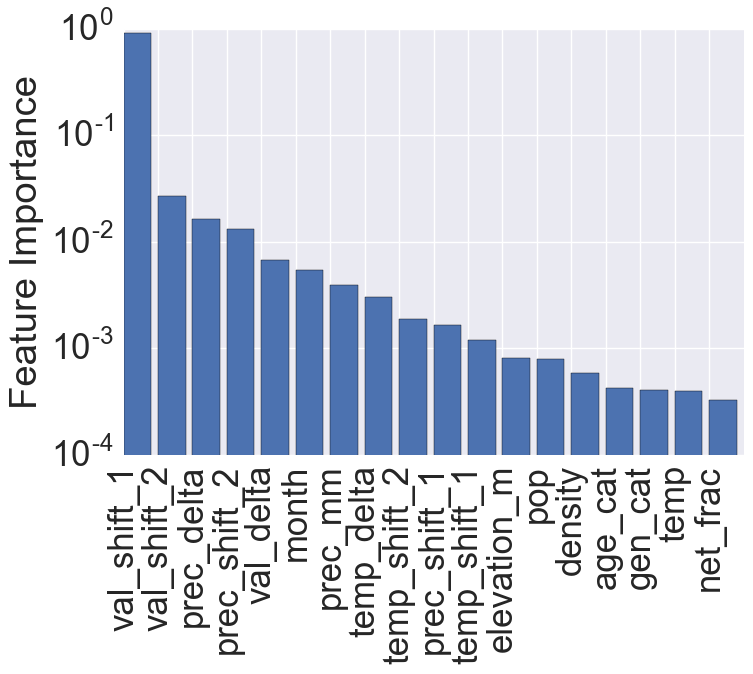

In [240]:
feature_imp = RF.feature_importances_
sorted_index = sorted(range(len(feature_imp)),key=lambda x:feature_imp[x], reverse=True)

x = range(len(RF.feature_importances_))
plt.bar(x, feature_imp[sorted_index])
xticks(x, [features[i] for i in sorted_index], rotation = 'vertical')
yscale('log')
ylabel('Feature Importance')

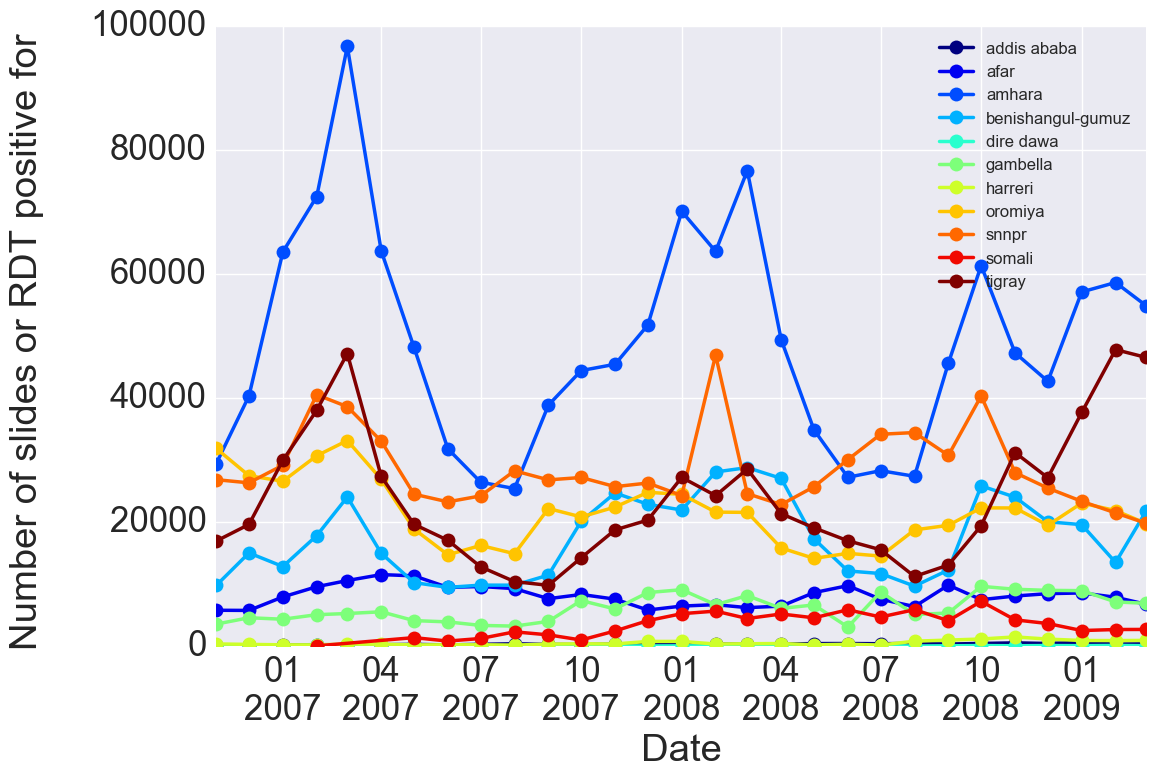

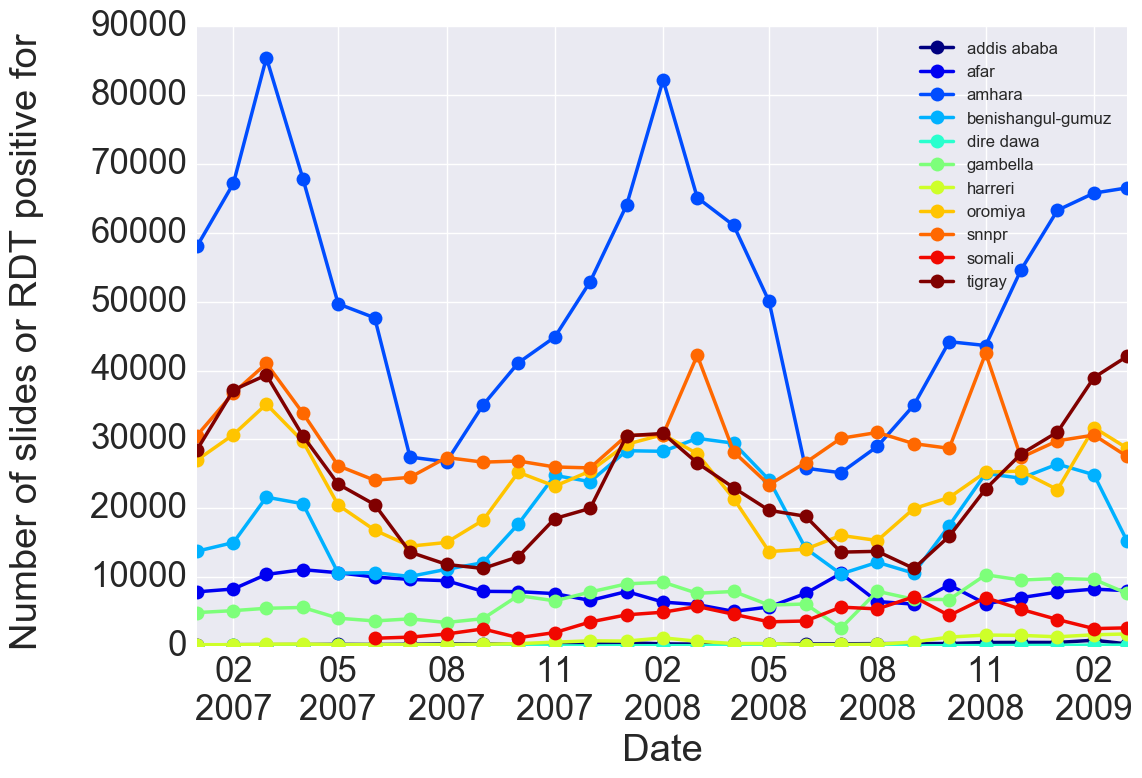

In [241]:
indicator = 'Number of slides or RDT positive for malaria'
series_d = plot_date_indicator(DF_ind, indicator, val_name='val')
series_p = plot_date_indicator(DF_shift, indicator, val_name='prediction')

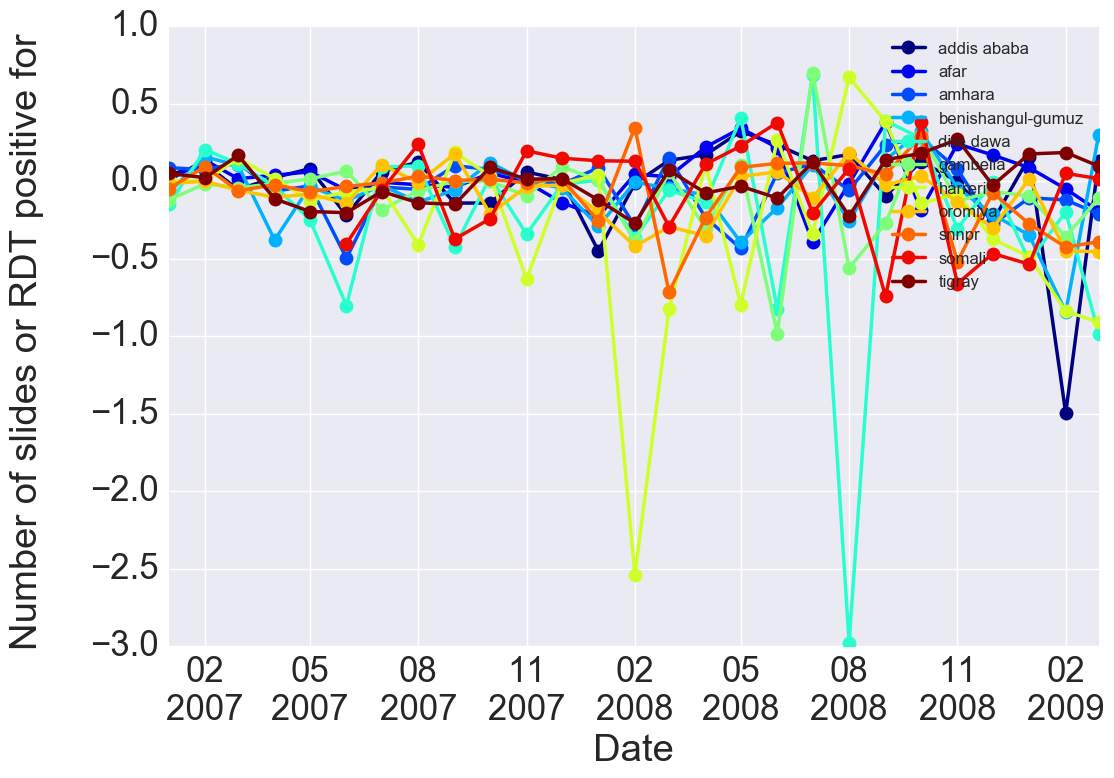

In [242]:
DF_shift['diff'] = DF_shift['val']-DF_shift['prediction']
DF_shift['norm_diff'] = (DF_shift['val']-DF_shift['prediction']) / DF_shift['val']
#DF_shift['norm_rmse'] = ( (DF_shift['val']-DF_shift['prediction']) / DF_shift['val'] )**2
DF_shift['mse'] = (DF_shift['val']-DF_shift['prediction']) ** 2
series_d = plot_date_indicator(DF_shift, indicator, val_name='norm_diff')

In [243]:
sqrt(mean((DF_shift['val']-DF_shift['prediction'])**2))

1863.912202029645

In [244]:
sqrt(DF_shift.groupby('Region').mse.mean())/DF_shift.groupby('Region').val.mean()*100

Region
addis ababa          50.127092
afar                 24.556871
amhara               29.612829
benishangul-gumuz    34.497859
dire dawa            69.194154
gambella             41.815160
harreri              93.374933
oromiya              27.872173
snnpr                33.683387
somali               55.032962
tigray               29.065377
dtype: float64

<h1> Quantify gender and age disparities </h1>

In [2170]:
ind_names

['Number of slides or RDT positive for malaria',
 'Number of slides or RDT positive for malaria < 5 years: Females',
 'Number of slides or RDT positive for malaria < 5 years: Males',
 'Number of slides or RDT positive for malaria 5-14 years: Females',
 'Number of slides or RDT positive for malaria 5-14 years: Males',
 'Number of slides or RDT positive for malaria >=15 years: Females',
 'Number of slides or RDT positive for malaria >=15 years: Males']

In [2240]:
DF_ind.loc[DF_ind['Indicator']=='Number of slides or RDT positive for malaria >=15 years: Males'].val.mean() / \
DF_ind.loc[DF_ind['Indicator']=='Number of slides or RDT positive for malaria >=15 years: Females'].val.mean()

DF_ind.loc[DF_ind['Indicator']=='Number of slides or RDT positive for malaria 5-14 years: Males'].val.mean() / \
DF_ind.loc[DF_ind['Indicator']=='Number of slides or RDT positive for malaria 5-14 years: Females'].val.mean()

DF_ind.loc[DF_ind['Indicator']=='Number of slides or RDT positive for malaria < 5 years: Males'].val.mean() / \
DF_ind.loc[DF_ind['Indicator']=='Number of slides or RDT positive for malaria < 5 years: Females'].val.mean()

1.2192850167173694

<h1> Simplified model </h1> 

In [349]:
RF = RandomForestRegressor()
#RF = GradientBoostingRegressor(learning_rate=.1, n_estimators=1000)

In [350]:
#train on 2007 data
DF_training = pd.DataFrame(DF_shift.loc[DF_shift['E_year'] <= 2007])

#all data
#DF_training = DF_shift

In [351]:
y = DF_training.val.values

features = ['density','month', 'elevation_m', 'net_frac', 'temp', 'prec_mm', 'temp_delta', 'prec_delta', \
              'val_delta', 'val_shift_1', 'temp_shift_1', 'prec_shift_1', \
              'val_shift_2', 'temp_shift_2', 'prec_shift_2', 'gen_cat', 'age_cat']

#features = ['pop','density','month', 'elevation_m', 'net_frac', 'temp', 'prec_mm', 'temp_delta', 'prec_delta', \
#              'val_delta', 'val_shift_1', 'temp_shift_1', 'prec_shift_1', \
#              'val_shift_2', 'temp_shift_2', 'prec_shift_2', 'gen_cat', 'age_cat']


x = DF_training[features].values

RF.fit(x,y)

x_all = DF_shift[features].values
prediction = RF.predict(x_all)

DF_shift['prediction'] = prediction


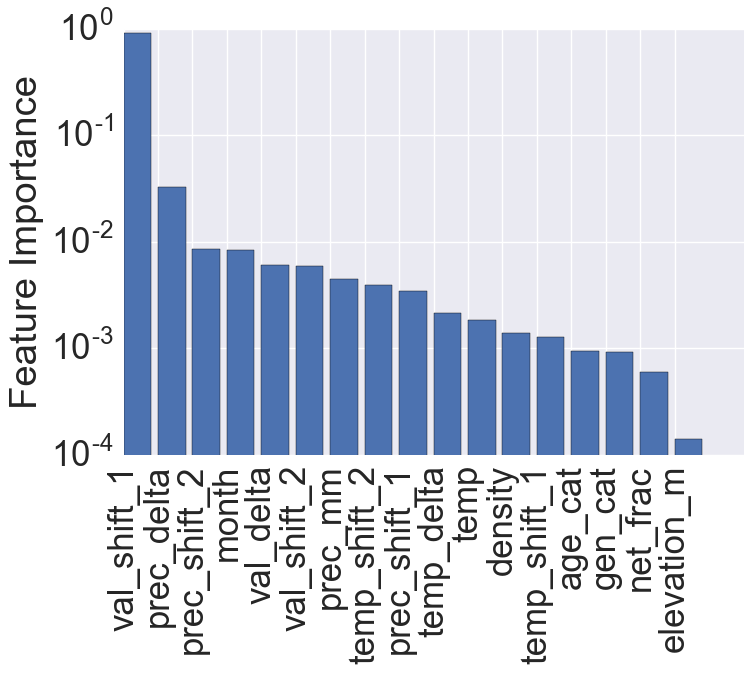

In [352]:
feature_imp = RF.feature_importances_
sorted_index = sorted(range(len(feature_imp)),key=lambda x:feature_imp[x], reverse=True)

x = range(len(feature_imp))
plt.bar(x, feature_imp[sorted_index])
xticks(x, [features[i] for i in sorted_index], rotation = 'vertical')
ylabel('Feature Importance')
yscale('log')

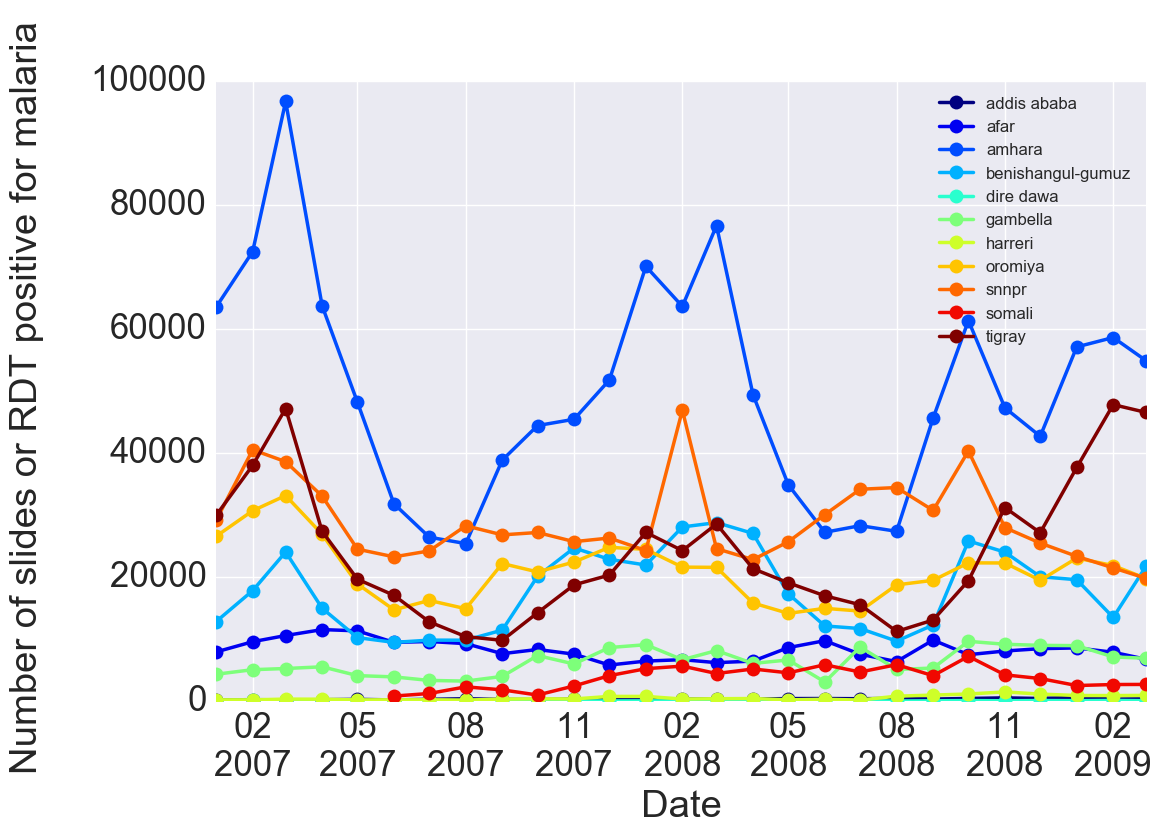

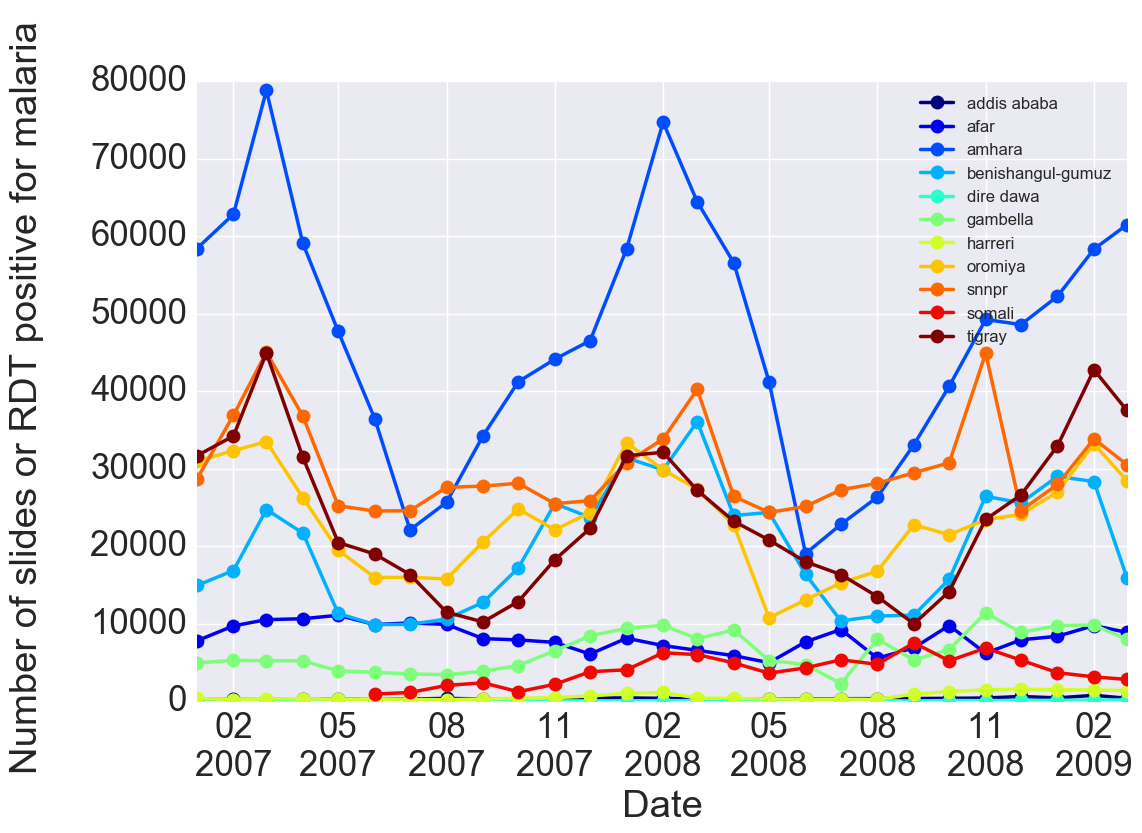

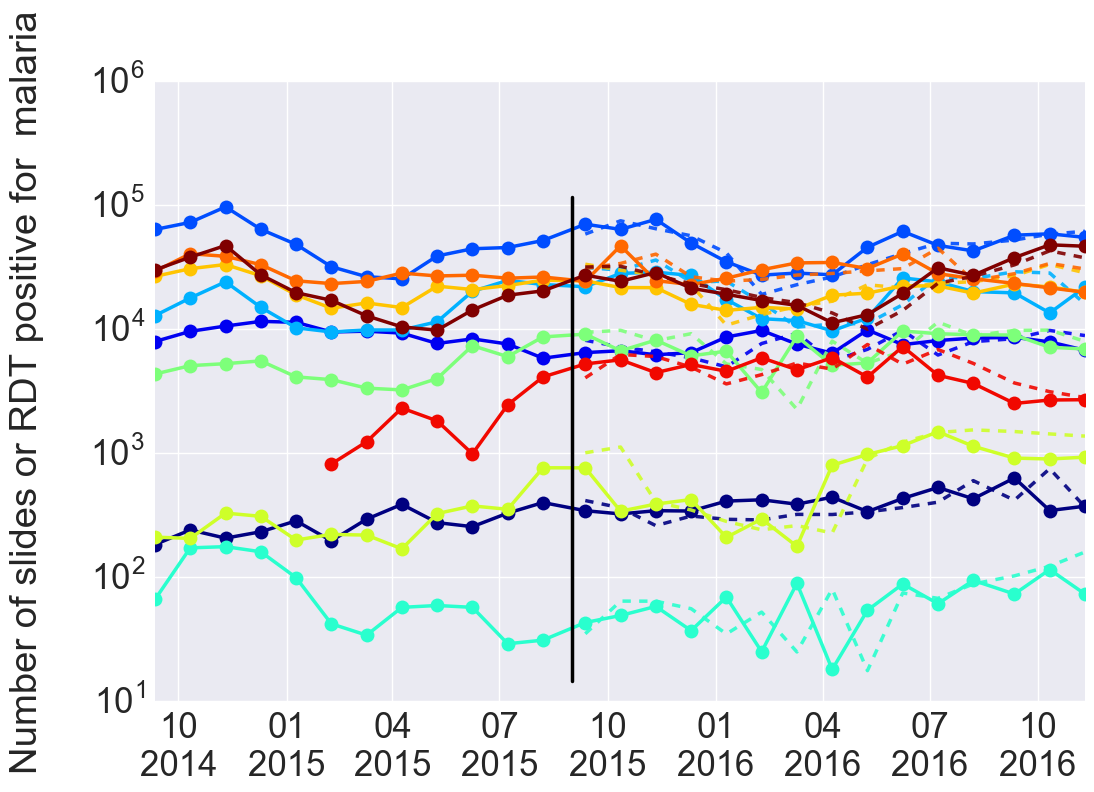

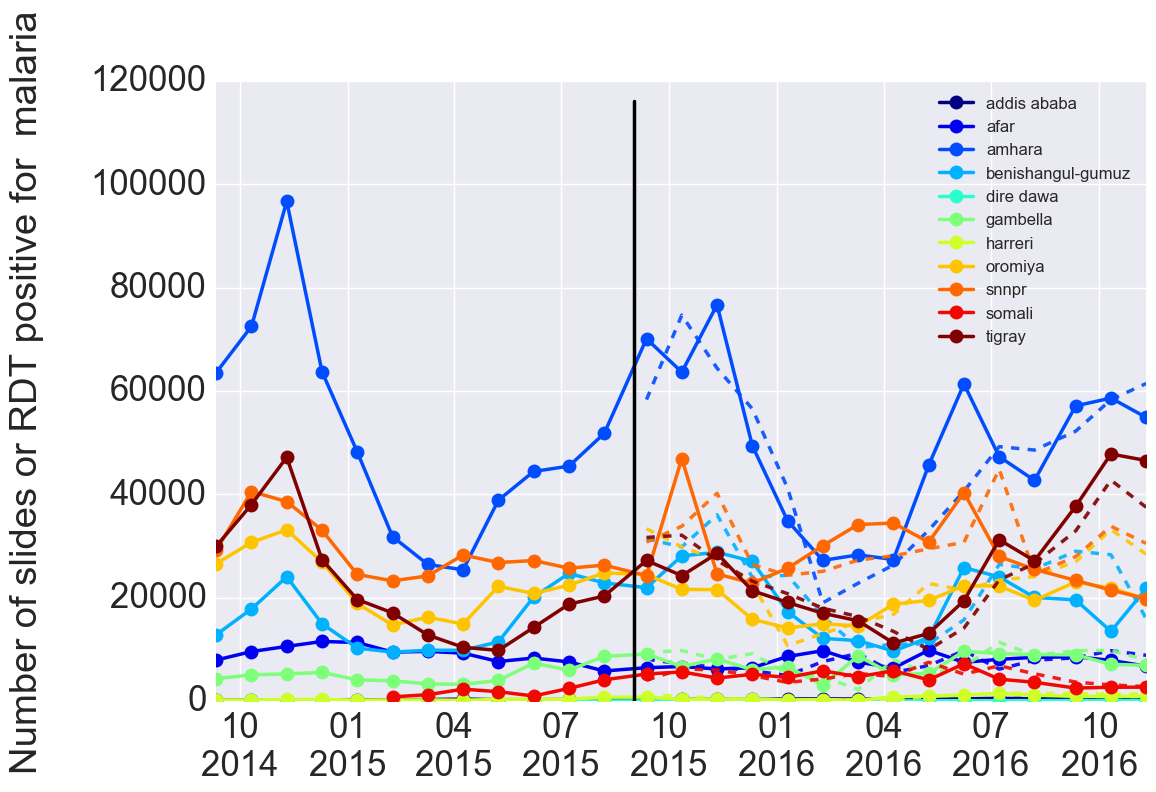

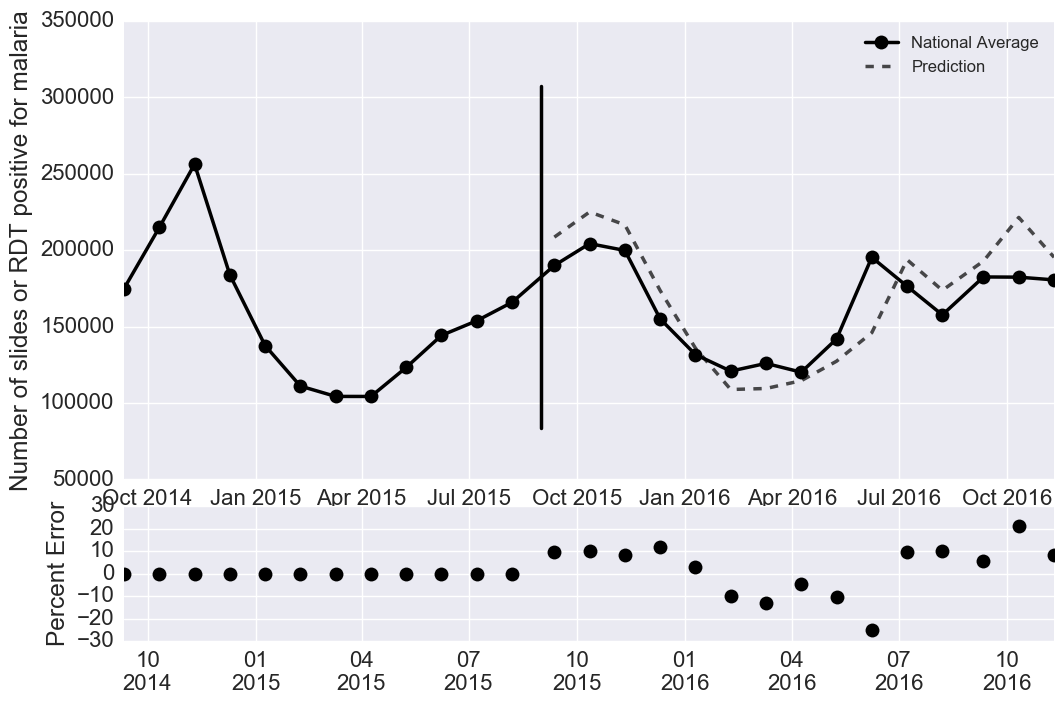

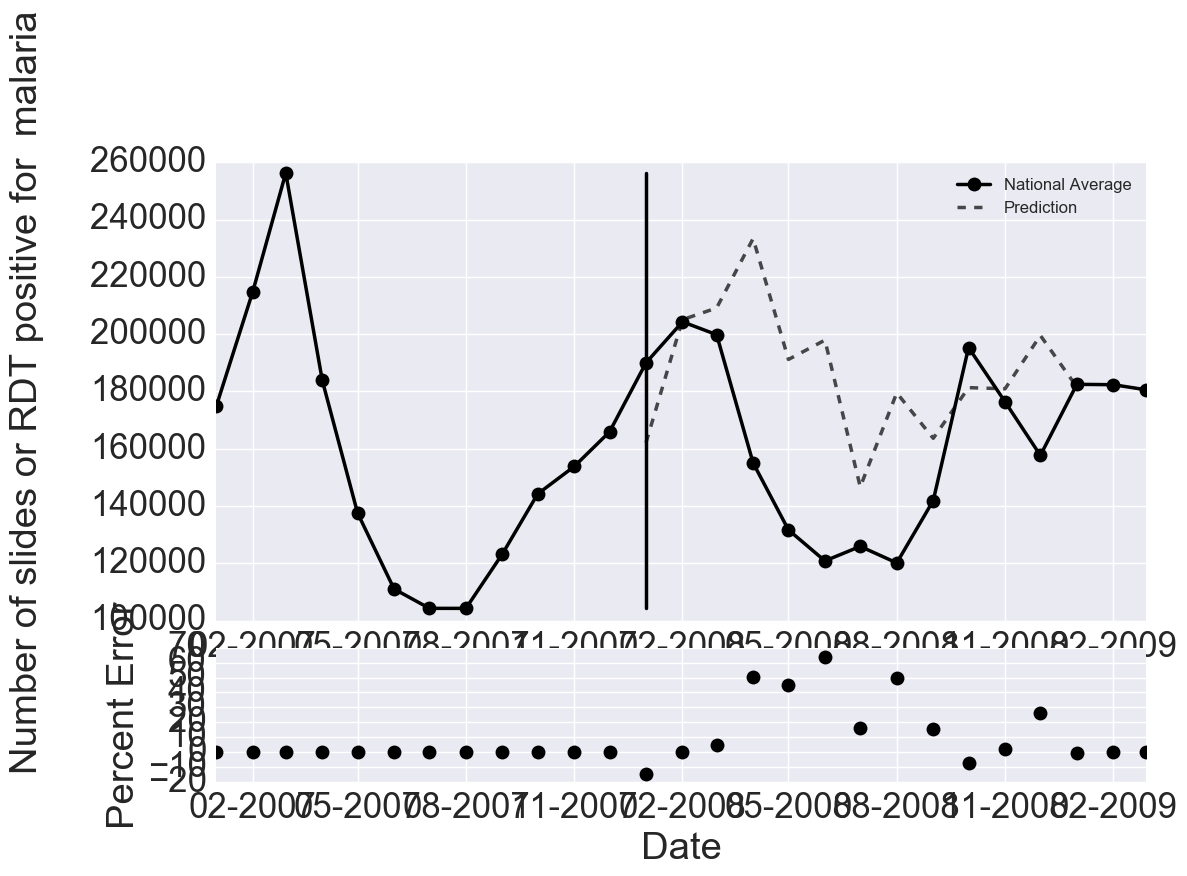

In [359]:
indicator = 'Number of slides or RDT positive for malaria'
series_plot = plot_date_indicator(DF_shift, indicator, val_name='val')
series_d = plot_date_indicator(DF_shift, indicator, val_name='prediction')

RMSE_zone = plot_testing(DF_shift, indicator, date_type='Real_Date', val_name='val', pred_name = 'prediction', train_year = 2007, horz_line = (2015,9), logscale = True, show_leg=False)
RMSE_zone = plot_testing(DF_shift, indicator, date_type='Real_Date', val_name='val', pred_name = 'prediction', train_year = 2007, horz_line = (2015,9), logscale = False)
to_plot, predict_plot, RMSE_n = plot_testing_nation(DF_shift, indicator, date_type='Real_Date', val_name='val', pred_name = 'prediction', train_year = 2007,  horz_line = (2015,9))


ext_DF = forecast(DF_training, RF, n_months=12)
# 1 year forcasting
to_plot, predict_plot, RMSE_n_for = plot_forcast_nation(DF_shift, ext_DF, indicator, val_name='val', train_year = 2007)



In [361]:
RMSE_n_for

0.26111634943713163

<h1> Results of 1 year of fitting and 1 year of testing </h1>

<h3> Average national RMSE </h3>

In [362]:
RMSE_n

0.13374265519177569

<h3> Average RMSE by zone </h3>

In [305]:
mean([val[1] for val in RMSE_zone])

0.39372372155003726

In [363]:
RMSE_zone

[(u'addis ababa', 0.4239058309228913),
 (u'afar', 0.22196805348941517),
 (u'amhara', 0.18514306811832315),
 (u'benishangul-gumuz', 0.38495702097887813),
 (u'dire dawa', 0.51745941509276139),
 (u'gambella', 0.40300024325087747),
 (u'harreri', 0.67906638558338417),
 (u'oromiya', 0.27511932944625578),
 (u'snnpr', 0.31642424292375732),
 (u'somali', 0.41412514213258272),
 (u'tigray', 0.19235698996560896)]

<h1> 2015 value in 2016 </h1>

In [323]:
DF_shift.loc[(DF_shift['Indicator']==ind) & (DF_shift['E_year']==2007)]

Indicator_id      val    Region  \
Real_Date                                            
2014-09-11  hmis_indicator_4531    210.0   harreri   
2014-10-11  hmis_indicator_4531    205.0   harreri   
2014-11-10  hmis_indicator_4531    328.0   harreri   
2014-12-10  hmis_indicator_4531    309.0   harreri   
2015-01-09  hmis_indicator_4531    199.0   harreri   
2015-02-08  hmis_indicator_4531    221.0   harreri   
2015-03-10  hmis_indicator_4531    218.0   harreri   
2015-04-09  hmis_indicator_4531    169.0   harreri   
2015-05-09  hmis_indicator_4531    325.0   harreri   
2015-06-08  hmis_indicator_4531    375.0   harreri   
2015-07-08  hmis_indicator_4531    352.0   harreri   
2015-08-07  hmis_indicator_4531    761.0   harreri   
2014-09-11  hmis_indicator_4531   7938.0      afar   
2014-10-11  hmis_indicator_4531   9585.0      afar   
2014-11-10  hmis_indicator_4531  10580.0      afar   
2014-12-10  hmis_indicator_4531  11538.0      afar   
2015-01-09  hmis_indicator_4531  11339.0      afar   
2015-02-08  hmis_indicator_4531   9475.0      afar   
2015-03-10  hmis_indicator_4531   9618.0      afar   
2015-04-09  hmis_indicator_4531   9277.0      afar   
2015-05-09  hmis_indicator_4531   7654.0      afar   
2015-06-08  hmis_indicator_4531   8334.0      afar   
2015-07-08  hmis_indicator_4531   7577.0      afar   
2015-08-07  hmis_indicator_4531   5823.0      afar   
2014-09-11  hmis_indicator_4531  63575.0    amhara   
...                         ...      ...       ...   
2015-08-07  hmis_indicator_4531  26307.0     snnpr   
2014-09-11  hmis_indicator_4531  29972.0    tigray   
2014-10-11  hmis_indicator_4531  38035.0    tigray   
2014-11-10  hmis_indicator_4531  47187.0    tigray   
2014-12-10  hmis_indicator_4531  27384.0    tigray   
2015-01-09  hmis_indicator_4531  19658.0    tigray   
2015-02-08  hmis_indicator_4531  17069.0    tigray   
2015-03-10  hmis_indicator_4531  12789.0    tigray   
2015-04-09  hmis_indicator_4531  10409.0    tigray   
2015-05-09  hmis_indicator_4531   9807.0    tigray   
2015-06-08  hmis_indicator_4531  14251.0    tigray   
2015-07-08  hmis_indicator_4531  18752.0    tigray   
2015-08-07  hmis_indicator_4531  20331.0    tigray   
2014-09-11  hmis_indicator_4531   4339.0  gambella   
2014-10-11  hmis_indicator_4531   5072.0  gambella   
2014-11-10  hmis_indicator_4531   5261.0  gambella   
2014-12-10  hmis_indicator_4531   5538.0  gambella   
2015-01-09  hmis_indicator_4531   4116.0  gambella   
2015-02-08  hmis_indicator_4531   3911.0  gambella   
2015-03-10  hmis_indicator_4531   3341.0  gambella   
2015-04-09  hmis_indicator_4531   3230.0  gambella   
2015-05-09  hmis_indicator_4531   3987.0  gambella   
2015-06-08  hmis_indicator_4531   7349.0  gambella   
2015-07-08  hmis_indicator_4531   5994.0  gambella   
2015-08-07  hmis_indicator_4531   8644.0  gambella   

                                               Indicator  gen_cat  age_cat  \
Real_Date                                                                    
2014-09-11  Number of slides or RDT positive for malaria        3        4   
2014-10-11  Number of slides or RDT positive for malaria        3        4   
2014-11-10  Number of slides or RDT positive for malaria        3        4   
2014-12-10  Number of slides or RDT positive for malaria        3        4   
2015-01-09  Number of slides or RDT positive for malaria        3        4   
2015-02-08  Number of slides or RDT positive for malaria        3        4   
2015-03-10  Number of slides or RDT positive for malaria        3        4   
2015-04-09  Number of slides or RDT positive for malaria        3        4   
2015-05-09  Number of slides or RDT positive for malaria        3        4   
2015-06-08  Number of slides or RDT positive for malaria        3        4   
2015-07-08  Number of slides or RDT positive for malaria        3        4   
2015-08-07  Number of slides or RDT positive for malaria        3        4   
2014-09-11  Number of slides or RDT positive for malaria        

In [318]:
DF_shift.val[(DF_shift['Indicator']==ind) & (DF_shift['E_year']==2007) & (DF_shift['E_month']==month)]

Real_Date
2014-11-10      328.0
2014-11-10    10580.0
2014-11-10    96716.0
2014-11-10      176.0
2014-11-10    24054.0
2014-11-10      206.0
2014-11-10    33157.0
2014-11-10    38622.0
2014-11-10    47187.0
2014-11-10     5261.0
Name: val, dtype: float64

In [333]:
overlap = [DF_shift.val[(DF_shift['Indicator']==ind) & (DF_shift['E_year']==2007) & (DF_shift['E_month']==month) \
               & (DF_shift['Region']==region)].values for ind,month,region \
                          in DF_shift[['Indicator','E_month','Region']].values]

In [335]:
overlap[0][0]

14.0

In [336]:
print sqrt(mean((DF_shift['val']-DF_shift['prediction'])**2))
sqrt(DF_shift.groupby('Region').mse.mean())/DF_shift.groupby('Region').mse.mean()*100

1739.6536962


Region
addis ababa          2.004740
afar                 0.171536
amhara               0.023499
benishangul-gumuz    0.056727
dire dawa            6.446471
gambella             0.132497
harreri              0.695542
oromiya              0.058907
snnpr                0.035912
somali               0.168206
tigray               0.049796
Name: mse, dtype: float64

<h1> Extrapolate 1 year </h1>

In [2271]:
DF_shift

Indicator_id     val    Region  \
Real_Date                                           
2014-09-11  hmis_indicator_3199    14.0   harreri   
2014-10-11  hmis_indicator_3199    14.0   harreri   
2014-11-10  hmis_indicator_3199    25.0   harreri   
2014-12-10  hmis_indicator_3199    22.0   harreri   
2015-01-09  hmis_indicator_3199    13.0   harreri   
2015-02-08  hmis_indicator_3199    18.0   harreri   
2015-03-10  hmis_indicator_3199     8.0   harreri   
2015-04-09  hmis_indicator_3199    23.0   harreri   
2015-05-09  hmis_indicator_3199    29.0   harreri   
2015-06-08  hmis_indicator_3199    31.0   harreri   
2015-07-08  hmis_indicator_3199    14.0   harreri   
2015-08-07  hmis_indicator_3199    75.0   harreri   
2015-09-12  hmis_indicator_3199    78.0   harreri   
2015-10-12  hmis_indicator_3199    23.0   harreri   
2015-11-11  hmis_indicator_3199    18.0   harreri   
2015-12-11  hmis_indicator_3199    26.0   harreri   
2016-01-10  hmis_indicator_3199    19.0   harreri   
2016-02-09  hmis_indicator_3199    15.0   harreri   
2016-03-10  hmis_indicator_3199     7.0   harreri   
2016-04-09  hmis_indicator_3199    46.0   harreri   
2016-05-09  hmis_indicator_3199    68.0   harreri   
2016-06-08  hmis_indicator_3199    89.0   harreri   
2016-07-08  hmis_indicator_3199   130.0   harreri   
2016-08-07  hmis_indicator_3199    67.0   harreri   
2016-09-11  hmis_indicator_3199    61.0   harreri   
...                         ...     ...       ...   
2014-10-11  hmis_indicator_4531  5072.0  gambella   
2014-11-10  hmis_indicator_4531  5261.0  gambella   
2014-12-10  hmis_indicator_4531  5538.0  gambella   
2015-01-09  hmis_indicator_4531  4116.0  gambella   
2015-02-08  hmis_indicator_4531  3911.0  gambella   
2015-03-10  hmis_indicator_4531  3341.0  gambella   
2015-04-09  hmis_indicator_4531  3230.0  gambella   
2015-05-09  hmis_indicator_4531  3987.0  gambella   
2015-06-08  hmis_indicator_4531  7349.0  gambella   
2015-07-08  hmis_indicator_4531  5994.0  gambella   
2015-08-07  hmis_indicator_4531  8644.0  gambella   
2015-09-12  hmis_indicator_4531  9102.0  gambella   
2015-10-12  hmis_indicator_4531  6682.0  gambella   
2015-11-11  hmis_indicator_4531  8152.0  gambella   
2015-12-11  hmis_indicator_4531  6082.0  gambella   
2016-01-10  hmis_indicator_4531  6644.0  gambella   
2016-02-09  hmis_indicator_4531  3081.0  gambella   
2016-03-10  hmis_indicator_4531  8736.0  gambella   
2016-04-09  hmis_indicator_4531  5106.0  gambella   
2016-05-09  hmis_indicator_4531  5338.0  gambella   
2016-06-08  hmis_indicator_4531  9646.0  gambella   
2016-07-08  hmis_indicator_4531  9173.0  gambella   
2016-08-07  hmis_indicator_4531  8995.0  gambella   
2016-09-11  hmis_indicator_4531  8950.0  gambella   
2016-10-11  hmis_indicator_4531  7129.0  gambella   

                                                    Indicator  gen_cat  \
Real_Date                                                                
2014-09-11  Number of slides or RDT positive for malaria <...        1   
2014-10-11  Number of slides or RDT positive for malaria <...        1   
2014-11-10  Number of slides or RDT positive for malaria <...        1   
2014-12-10  Number of slides or RDT positive for malaria <...        1   
2015-01-09  Number of slides or RDT positive for malaria <...        1   
2015-02-08  Number of slides or RDT positive for malaria <...        1   
2015-03-10  Number of slides or RDT positive for malaria <...        1   
2015-04-09  Number of slides or RDT positive for malaria <...        1   
2015-05-09  Number of slides or RDT positive for malaria <...        1   
2015-06-08  Number of slides or RDT positive for malaria <...        1   
2015-07-08  Number of slides or RDT positive for malaria <...        1   
2015-08-07  Number of slides or RDT positive for malaria <...        1   
2015-09-12  Number of slides or RDT positive for malaria <...        1   
2015-10-12  Number of slides or RDT positive for malaria <...        1   
2015-11-11  Number of sli

In [2372]:
# This is already cut on the indicators of interest
DF_test = DF_shift.reset_index().set_index(['Region','E_Date'])

#forcast the training data: year <= 2007
DF_test = DF_training.reset_index().set_index(['Region','E_Date'])

<h3> extrapolate one month at a time for each Region</h3>

In [226]:
def forecast(DF_test, RF, n_months=12):
    '''Pass in DF_shift to start from last month in the data or DF_training to start at last training month
    also specify the number of months to project (n_months = 12)
    Return the extended data frame'''
    
    # Initialize empty dataframe for projection
    ext_DF = pd.DataFrame()
    
    # set the index to Region and Ethiopian date
    DF_test = DF_test.reset_index().set_index(['Region','E_Date'])
    for region in DF_test.index.levels[0]:

        DF_temp = DF_test.loc[region]

        for xx in range(n_months+1):
            last_entry = DF_temp.tail(1).reset_index()

            x = last_entry[features].values.reshape(1,-1)

            # predict new value:
            new_val = RF.predict(x)

            last_entry['val'] = new_val

            # increment date

            last_entry['E_Date'] = add_one_month(last_entry['E_Date'][0])
            last_entry.set_index('E_Date', inplace=True)

            # replace Real_Date with incremented E_Date
            last_entry['Real_Date'] = ethiopian_date.EthiopianDateConverter.date_to_gregorian(last_entry.index[0])

            last_entry.reset_index(inplace = True)

            last_entry['E_year'] = last_entry['E_Date'][0].year
            last_entry['E_month'] = last_entry['E_Date'][0].month
            last_entry['month'] = last_entry['Real_Date'][0].month
            last_entry['year'] = last_entry['Real_Date'][0].year

            #update current weather info

            last_entry['temp'] = [DF_weather.loc[capital,'temp'][inv_month_map[month]] for capital,month in zip(last_entry['capital'],last_entry['month'])]
            last_entry['prec_mm'] = [DF_weather.loc[capital,'prec_mm'][inv_month_map[month]] for capital,month in zip(last_entry['capital'],last_entry['month'])]
            last_entry['prec_mm'] = last_entry['prec_mm'].replace(nan,0)

            last_entry['temp_cat'] = [temp_map(temp) for temp in last_entry['temp']]
            last_entry['prec_cat'] = [prec_map(prec) for prec in last_entry['prec_mm']]

            # The hard part... add the extrapolations 

            last_entry['val_shift_1'] = DF_temp.iloc[-1]['val']
            last_entry['temp_shift_1'] = DF_temp.iloc[-1]['temp']
            last_entry['temp_cat_shift_1'] = DF_temp.iloc[-1]['temp_cat']
            last_entry['prec_shift_1'] = DF_temp.iloc[-1]['prec_mm']
            last_entry['prec_cat_shift_1'] = DF_temp.iloc[-1]['prec_cat']
            #DF_ext['Region_shift_1'] = DF_temp.iloc[-1]['Region']
            #DF_ext['Ind_shift_1'] = DF_temp.iloc[-1]['Indicator']
            last_entry['temp_delta'] = last_entry['temp'] - DF_temp.iloc[-1]['temp_shift_1']
            last_entry['prec_delta'] = last_entry['prec_mm'] - DF_temp.iloc[-1]['prec_shift_1']

            last_entry['val_shift_2'] = DF_temp.iloc[-2]['val']
            last_entry['temp_shift_2'] = DF_temp.iloc[-2]['temp']
            last_entry['temp_cat_shift_2'] = DF_temp.iloc[-2]['temp_cat']
            last_entry['prec_shift_2'] = DF_temp.iloc[-2]['prec_mm']
            last_entry['prec_cat_shift_2'] = DF_temp.iloc[-2]['prec_cat']
            #last_entry['Region_shift_2'] = DF_ext.shift(2)['Region']
            #last_entry['Ind_shift_2'] = DF_ext.shift(2)['Indicator']
            last_entry['val_delta'] =  (last_entry['val_shift_1'] - last_entry['val_shift_2']) / last_entry['val_shift_2']


            # tack on to the end of the DF
            last_entry.set_index('E_Date', inplace = True)
            DF_temp = DF_temp.append(last_entry)

        # add back the region name   
        DF_temp['Region'] = region
        ext_DF = pd.concat([ext_DF, DF_temp])

    ext_DF.reset_index(inplace = True)   
    ext_DF.set_index('Real_Date', inplace = True)
    return ext_DF

In [2329]:
RMSE_zone

[(u'addis ababa', 0.34884341651316036),
 (u'afar', 0.27042664757457119),
 (u'amhara', 0.35375260719082585),
 (u'benishangul-gumuz', 0.80609137210566273),
 (u'dire dawa', 0.50011943145776094),
 (u'gambella', 0.44683961779255021),
 (u'harreri', 2.0544196031353081),
 (u'oromiya', 0.40754390429270448),
 (u'snnpr', 0.44101248441796465),
 (u'somali', 0.45011710825906448),
 (u'tigray', 0.31342226250475824)]

UnboundLocalError: local variable 'RMSE_n' referenced before assignment

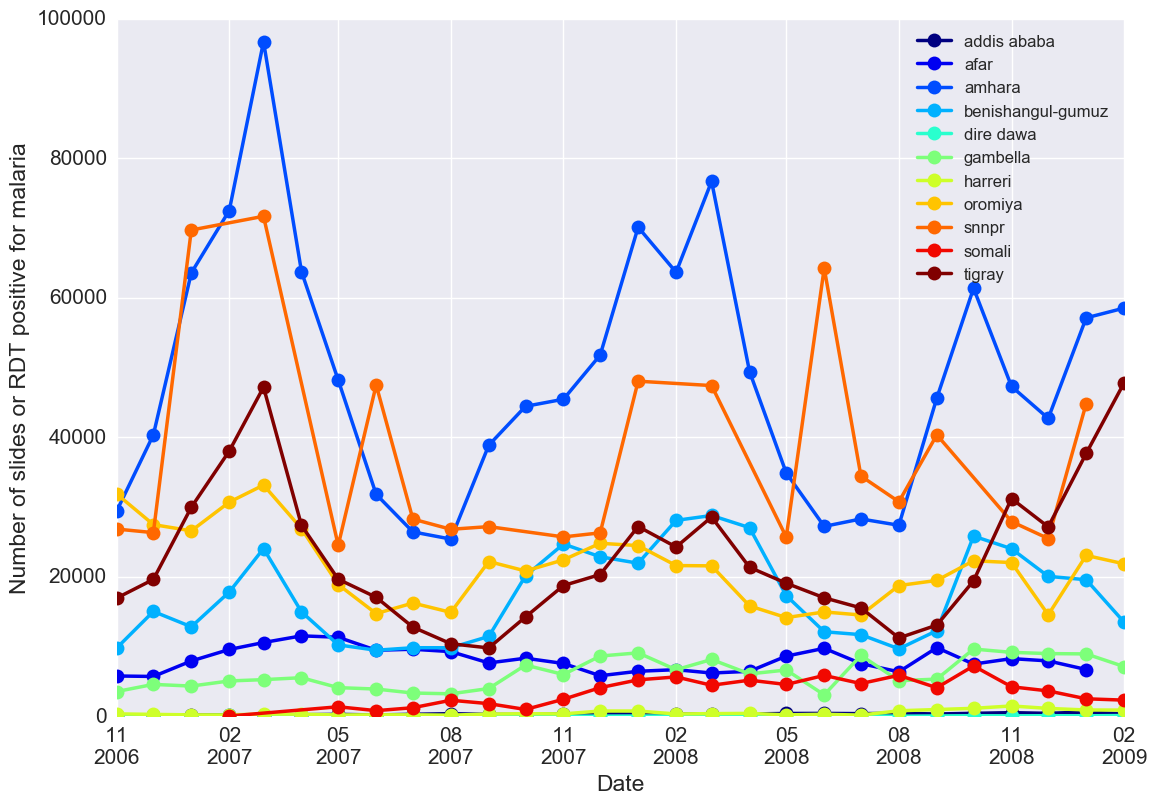

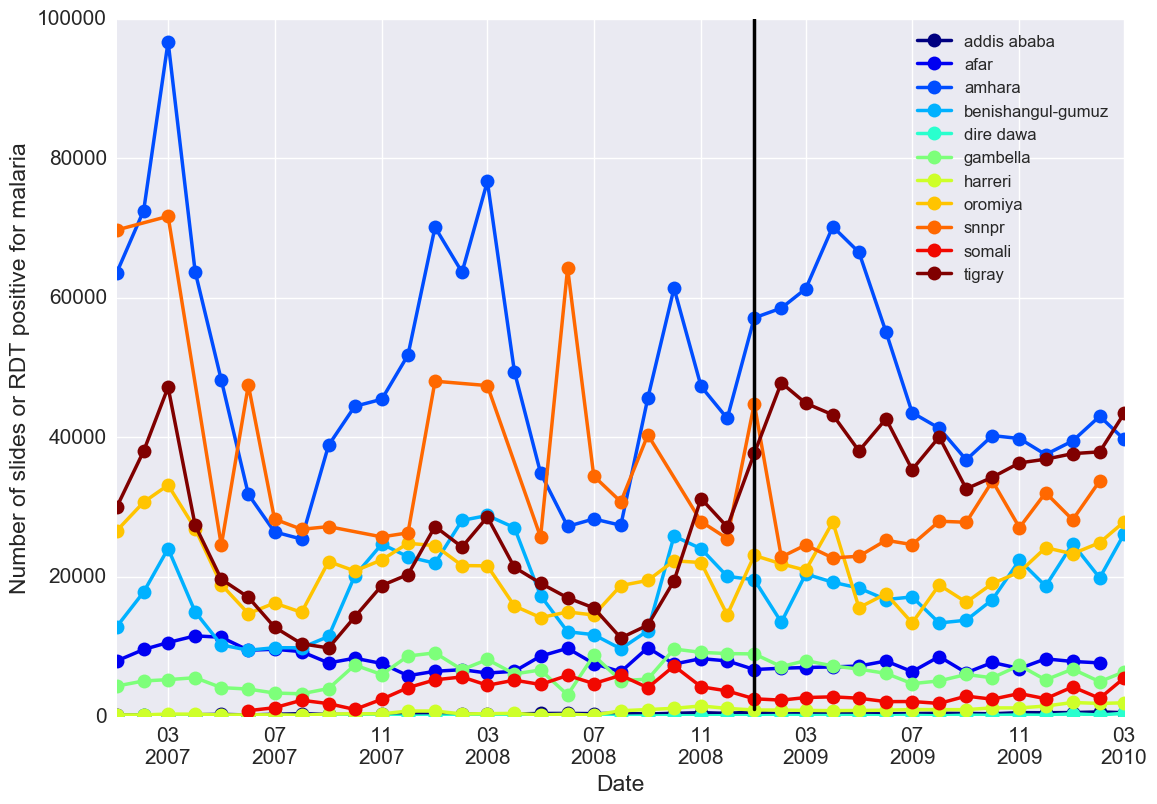

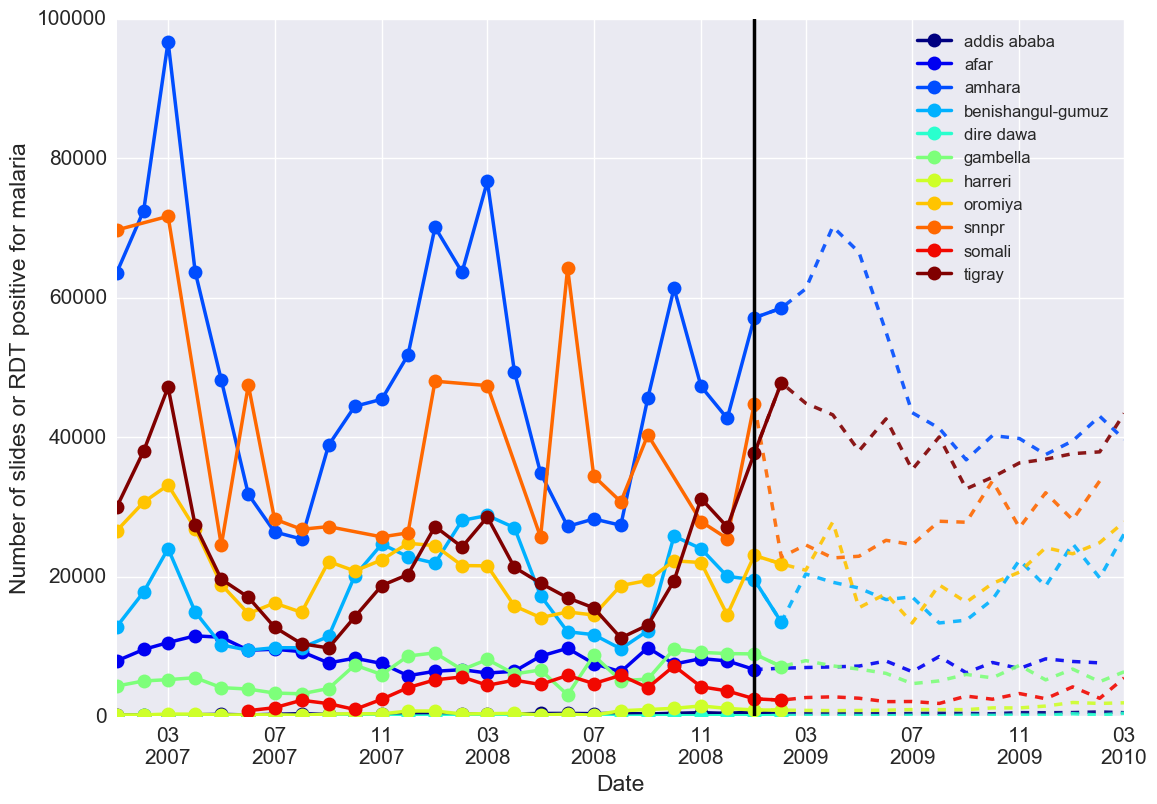

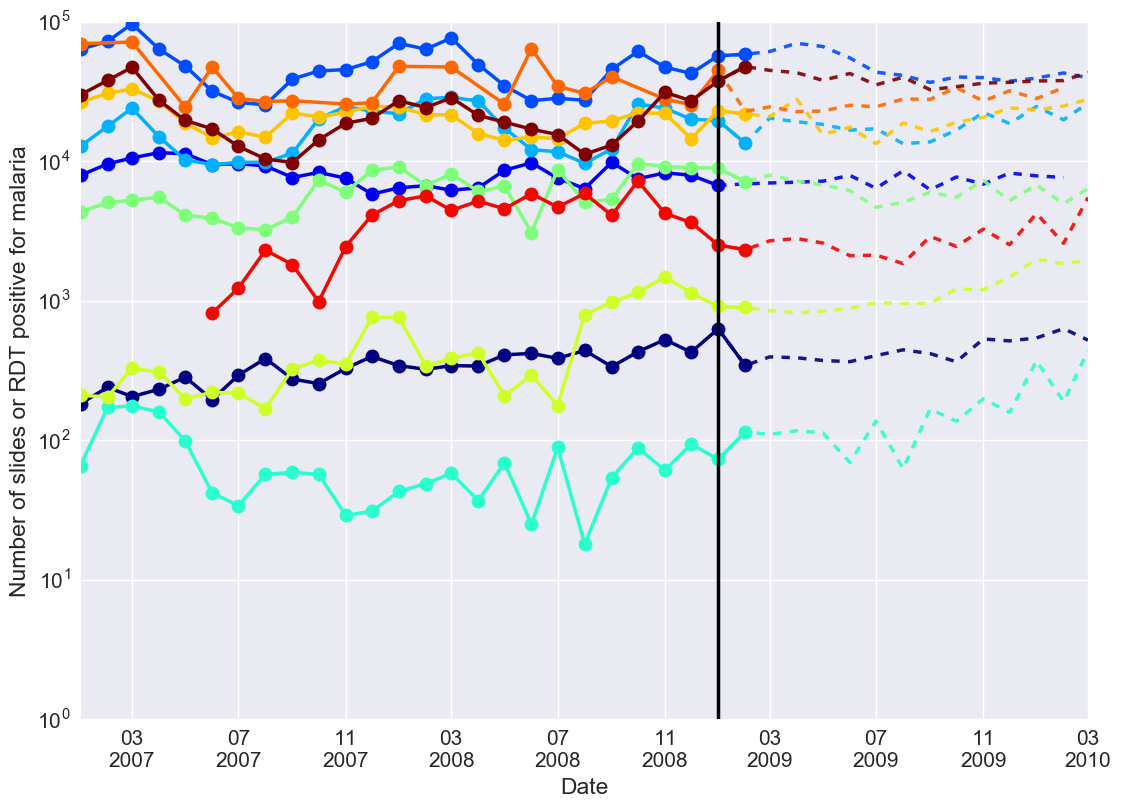

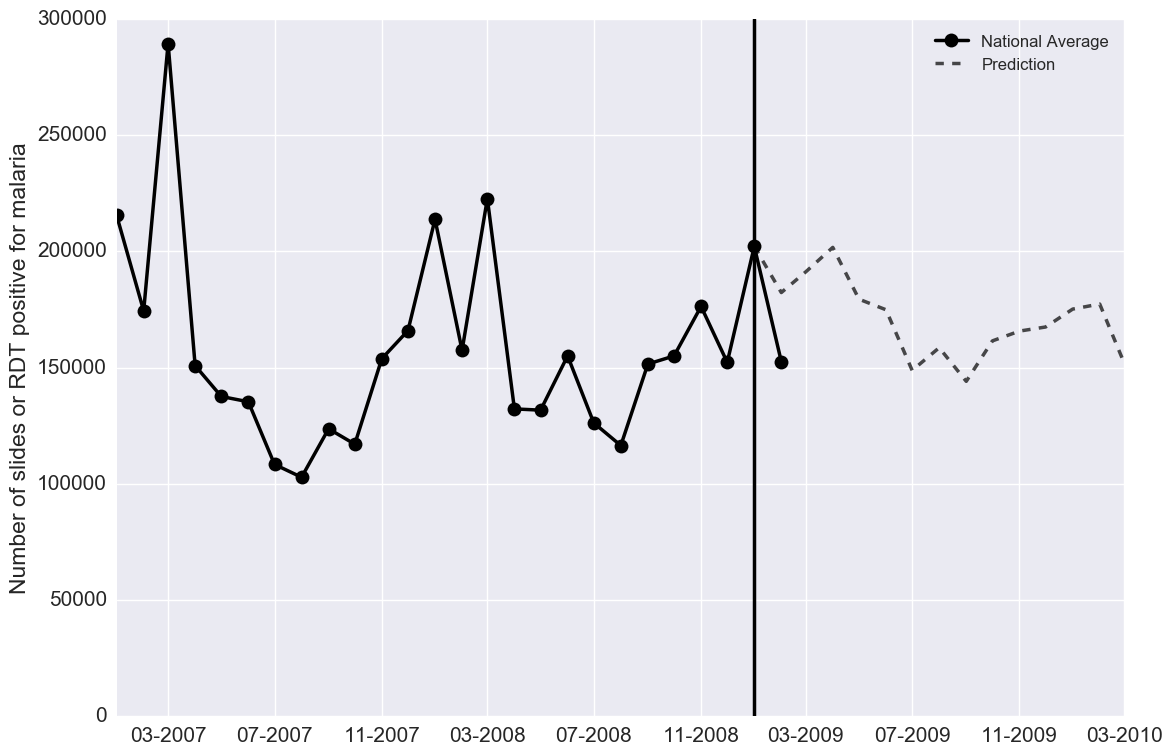

In [2374]:
series_plot = plot_date_indicator(DF_ind, indicator, val_name='val')
series_plot = plot_date_indicator(ext_DF, indicator, val_name='val')
#plt.plot_date(['2009-03-01', '2009-03-01'],[1000,100000],'-', color = 'k')
plt.plot_date(['2009-01-01', '2009-01-01'],[1000,100000],'-', color = 'k')

RMSE_zone = plot_forcasting(DF_shift, ext_DF, indicator, val_name='val', train_year = 2008, logscale = False, show_leg=True)


RMSE_zone = plot_forcasting(DF_shift, ext_DF, indicator, val_name='val', train_year = 2008, logscale = True, show_leg=False)

to_plot, predict_plot, RMSE_n_for = plot_forcast_nation(DF_shift, ext_DF, indicator, val_name='val', train_year = 2008, res=False)



In [2334]:
mean([val[1] for val in RMSE_zone])

0.58114440502221199

In [1554]:
DF_ind

Indicator_id          val    Region  \
Real_Date                                                
2015-09-12     hmis_c_1_4_2_5_4     0.991171   harreri   
2014-07-08  hmis_indicator_3199    21.000000   harreri   
2014-08-07  hmis_indicator_3199    35.000000   harreri   
2014-09-11  hmis_indicator_3199    14.000000   harreri   
2014-10-11  hmis_indicator_3199    14.000000   harreri   
2014-11-10  hmis_indicator_3199    25.000000   harreri   
2014-12-10  hmis_indicator_3199    22.000000   harreri   
2015-01-09  hmis_indicator_3199    13.000000   harreri   
2015-02-08  hmis_indicator_3199    18.000000   harreri   
2015-03-10  hmis_indicator_3199     8.000000   harreri   
2015-04-09  hmis_indicator_3199    23.000000   harreri   
2015-05-09  hmis_indicator_3199    29.000000   harreri   
2015-06-08  hmis_indicator_3199    31.000000   harreri   
2015-07-08  hmis_indicator_3199    14.000000   harreri   
2015-08-07  hmis_indicator_3199    75.000000   harreri   
2015-09-12  hmis_indicator_3199    78.000000   harreri   
2015-10-12  hmis_indicator_3199    23.000000   harreri   
2015-11-11  hmis_indicator_3199    18.000000   harreri   
2015-12-11  hmis_indicator_3199    26.000000   harreri   
2016-01-10  hmis_indicator_3199    19.000000   harreri   
2016-02-09  hmis_indicator_3199    15.000000   harreri   
2016-03-10  hmis_indicator_3199     7.000000   harreri   
2016-04-09  hmis_indicator_3199    46.000000   harreri   
2016-05-09  hmis_indicator_3199    68.000000   harreri   
2016-06-08  hmis_indicator_3199    89.000000   harreri   
...                         ...          ...       ...   
2014-10-11  hmis_indicator_4531  5072.000000  gambella   
2014-11-10  hmis_indicator_4531  5261.000000  gambella   
2014-12-10  hmis_indicator_4531  5538.000000  gambella   
2015-01-09  hmis_indicator_4531  4116.000000  gambella   
2015-02-08  hmis_indicator_4531  3911.000000  gambella   
2015-03-10  hmis_indicator_4531  3341.000000  gambella   
2015-04-09  hmis_indicator_4531  3230.000000  gambella   
2015-05-09  hmis_indicator_4531  3987.000000  gambella   
2015-06-08  hmis_indicator_4531  7349.000000  gambella   
2015-07-08  hmis_indicator_4531  5994.000000  gambella   
2015-08-07  hmis_indicator_4531  8644.000000  gambella   
2015-09-12  hmis_indicator_4531  9102.000000  gambella   
2015-10-12  hmis_indicator_4531  6682.000000  gambella   
2015-11-11  hmis_indicator_4531  8152.000000  gambella   
2015-12-11  hmis_indicator_4531  6082.000000  gambella   
2016-01-10  hmis_indicator_4531  6644.000000  gambella   
2016-02-09  hmis_indicator_4531  3081.000000  gambella   
2016-03-10  hmis_indicator_4531  8736.000000  gambella   
2016-04-09  hmis_indicator_4531  5106.000000  gambella   
2016-05-09  hmis_indicator_4531  5338.000000  gambella   
2016-06-08  hmis_indicator_4531  9646.000000  gambella   
2016-07-08  hmis_indicator_4531  9173.000000  gambella   
2016-08-07  hmis_indicator_4531  8995.000000  gambella   
2016-09-11  hmis_indicator_4531  8950.000000  gambella   
2016-10-11  hmis_indicator_4531  7129.000000  gambella   

                                                    Indicator     E_Date  \
Real_Date                                                                  
2015-09-12  Proportion of targeted HH covered with LLIN in... 2008-01-01   
2014-07-08  Number of slides or RDT positive for malaria <... 2006-11-01   
2014-08-07  Number of slides or RDT positive for malaria <... 2006-12-01   
2014-09-11  Number of slides or RDT positive for malaria <... 2007-01-01   
2014-10-11  Number of slides or RDT positive for malaria <... 2007-02-01   
2014-11-10  Number of slides or RDT positive for malaria <... 2007-03-01   
2014-12-10  Number of slides or RDT positive for malaria <... 2007-04-01   
2015-01-09  Number of slides or RDT positive for malaria <... 2007-05-01   
2015-02-08  Number of slides or RDT positive for malaria <... 2007-06-01   
2015-03-10  Number of slides or RDT positive for malaria <... 2007-07-01   
2015-04-09  Number of slides or 

<h1> Write to json or cvs </h1>

In [2375]:
ext_DF

E_Date         Indicator_id      val  \
Real_Date                                                      
2014-09-11 00:00:00 2007-01-01  hmis_indicator_3199      6.0   
2014-10-11 00:00:00 2007-02-01  hmis_indicator_3199     42.0   
2014-11-10 00:00:00 2007-03-01  hmis_indicator_3199      7.0   
2014-12-10 00:00:00 2007-04-01  hmis_indicator_3199      8.0   
2015-01-09 00:00:00 2007-05-01  hmis_indicator_3199      7.0   
2015-02-08 00:00:00 2007-06-01  hmis_indicator_3199      8.0   
2015-03-10 00:00:00 2007-07-01  hmis_indicator_3199      4.0   
2015-04-09 00:00:00 2007-08-01  hmis_indicator_3199     20.0   
2015-05-09 00:00:00 2007-09-01  hmis_indicator_3199     13.0   
2015-06-08 00:00:00 2007-10-01  hmis_indicator_3199     14.0   
2015-07-08 00:00:00 2007-11-01  hmis_indicator_3199     20.0   
2015-08-07 00:00:00 2007-12-01  hmis_indicator_3199      6.0   
2015-09-12 00:00:00 2008-01-01  hmis_indicator_3199      4.0   
2015-10-12 00:00:00 2008-02-01  hmis_indicator_3199      3.0   
2015-11-11 00:00:00 2008-03-01  hmis_indicator_3199      4.0   
2015-12-11 00:00:00 2008-04-01  hmis_indicator_3199      9.0   
2016-01-10 00:00:00 2008-05-01  hmis_indicator_3199     11.0   
2016-02-09 00:00:00 2008-06-01  hmis_indicator_3199      7.0   
2016-03-10 00:00:00 2008-07-01  hmis_indicator_3199      8.0   
2016-04-09 00:00:00 2008-08-01  hmis_indicator_3199     11.0   
2016-05-09 00:00:00 2008-09-01  hmis_indicator_3199     22.0   
2016-06-08 00:00:00 2008-10-01  hmis_indicator_3199     18.0   
2016-07-08 00:00:00 2008-11-01  hmis_indicator_3199     12.0   
2016-08-07 00:00:00 2008-12-01  hmis_indicator_3199      9.0   
2016-09-11 00:00:00 2009-01-01  hmis_indicator_3199     11.0   
...                        ...                  ...      ...   
2015-11-11 00:00:00 2008-03-01  hmis_indicator_4531  28575.0   
2015-12-11 00:00:00 2008-04-01  hmis_indicator_4531  21364.0   
2016-01-10 00:00:00 2008-05-01  hmis_indicator_4531  19084.0   
2016-02-09 00:00:00 2008-06-01  hmis_indicator_4531  16994.0   
2016-03-10 00:00:00 2008-07-01  hmis_indicator_4531  15545.0   
2016-04-09 00:00:00 2008-08-01  hmis_indicator_4531  11239.0   
2016-05-09 00:00:00 2008-09-01  hmis_indicator_4531  13080.0   
2016-06-08 00:00:00 2008-10-01  hmis_indicator_4531  19425.0   
2016-07-08 00:00:00 2008-11-01  hmis_indicator_4531  31221.0   
2016-08-07 00:00:00 2008-12-01  hmis_indicator_4531  27160.0   
2016-09-11 00:00:00 2009-01-01  hmis_indicator_4531  37686.0   
2016-10-11 00:00:00 2009-02-01  hmis_indicator_4531  47822.0   
2016-11-10          2009-03-01  hmis_indicator_4531  44889.0   
2016-12-10          2009-04-01  hmis_indicator_4531  43227.8   
2017-01-09          2009-05-01  hmis_indicator_4531  38051.7   
2017-02-08          2009-06-01  hmis_indicator_4531  42648.8   
2017-03-10          2009-07-01  hmis_indicator_4531  35371.4   
2017-04-09          2009-08-01  hmis_indicator_4531  40057.7   
2017-05-09          2009-09-01  hmis_indicator_4531  32620.5   
2017-06-08          2009-10-01  hmis_indicator_4531  34279.5   
2017-07-08          2009-11-01  hmis_indicator_4531  36333.4   
2017-08-07          2009-12-01  hmis_indicator_4531  36864.5   
2017-09-11          2010-01-01  hmis_indicator_4531  37661.6   
2017-10-11          2010-02-01  hmis_indicator_4531  37918.4   
2017-11-10          2010-03-01  hmis_indicator_4531  43423.2   

                                                             Indicator  \
Real_Date                                                                
2014-09-11 00:00:00  Number of slides or RDT positive for malaria <...   
2014-10-11 00:00:00  Number of slides or RDT positive for malaria <...   
2014-11-10 00:00:00  Number of slides or RDT positive for malaria <...   
2014-12-10 00:00:00  Number of slides or RDT positive for malaria <...   
2015-01-09 00:00:00  Number of slides or RDT positive for malaria <...   
2015-02-08 00:00:00  Number of slides or RDT positive for malaria <...   
2015-03-10 00:00:00  Number of slides o

<h1> Canonical region information mapping </h1>

In [77]:
DF_region_map = pd.read_csv('/Users/attiladobi/zenysis/pipeline/auto/ethiopia/bin/shared/data/region_mapped.csv', \
                           float_precision='high', dtype={'RegionLat': np.float128, 'RegionLon': np.float128})
DF_region_map['RegionName_lower'] = [name.lower() for name in DF_region_map['RegionName']]
DF_region_map.set_index('RegionName_lower', inplace=True)
                                     

In [2604]:
pd.options.display.float_format = '{:20,.5f}'.format
DF_region_map['RegionLat'].astype(np.float128)

RegionName_lower
addis ababa                      8.98048
afar                            12.03645
amhara                          11.56495
benishangul-gumuz               10.50292
dire dawa                        9.60627
gambella                         7.68385
harreri                          9.28966
oromiya                          7.32357
somali                           6.93278
snnpr                            6.46581
tigray                          13.77711
Name: RegionLat, dtype: float128

In [2588]:
lat_lon_map = { 'Addis Ababa': (8.980483001254077, 38.78553834507309), 
'Afar': (12.036445063176075, 40.772735414805204),
'Amhara': (11.5649524790046, 38.04353615460529),
'Benishangul-Gumuz': (10.502924415157686, 35.44030701966273),
'Dire Dawa': (9.606269193503696, 42.003026894902156),
'Gambella':(7.683850454124325, 34.33675414861345),
'Harreri': (9.289660023774802, 42.172525872858124),
'Oromiya': (7.323567398452454, 38.66052453790127),
'Somali': (6.932778405509416, 43.32988331430246),
'SNNPR': (6.465808724769859, 36.806469462905675),
'Tigray': (13.777114742142253, 38.43867332133363 ),  
}    
    

In [2636]:
DF2['byGeo'][0]

{u'addis ababa______': {u'data': {u'all': {u'2000-01-01T00:00:00.000Z': {u'hmis_c_1_4_2_5_4': 0,
     u'hmis_indicator_3199': 305,
     u'hmis_indicator_3200': 130,
     u'hmis_indicator_3201': 435,
     u'hmis_indicator_3202': 322,
     u'hmis_indicator_3203': 5570,
     u'hmis_indicator_3204': 2486,
     u'hmis_indicator_3205': 50024,
     u'hmis_indicator_4531': 9248}},
   u'month': {u'2014-07-08T00:00:00.000Z': {u'Real_Date': u'2014-07-08T00:00:00.000Z',
     u'hmis_c_1_4_2_5_4': 0,
     u'hmis_indicator_3199': 5,
     u'hmis_indicator_3200': 1,
     u'hmis_indicator_3201': 18,
     u'hmis_indicator_3202': 6,
     u'hmis_indicator_3203': 72,
     u'hmis_indicator_3204': 30,
     u'hmis_indicator_3205': 427,
     u'hmis_indicator_4531': 132},
    u'2014-08-07T00:00:00.000Z': {u'Real_Date': u'2014-08-07T00:00:00.000Z',
     u'hmis_c_1_4_2_5_4': 0,
     u'hmis_indicator_3199': 4,
     u'hmis_indicator_3200': 0,
     u'hmis_indicator_3201': 4,
     u'hmis_indicator_3202': 9,
     u'hmi

In [2633]:
lat_lon_map['SNNPR']

(6.465808724769859, 36.806469462905675)

<h1> format the data into json for injestion </h1>

In [2602]:
Formatted_DF = ext_DF[['val', 'Region', 'Indicator_id']].rename(columns = \
                                {'Indicator_id': 'field', 'Region': 'RegionName'})
Formatted_DF['field'] = ['forecast_%s' % (field) for field in Formatted_DF['field']]
Formatted_DF.index = pd.DatetimeIndex(Formatted_DF.index)

Formatted_DF['RegionLat'] = [DF_region_map.loc[region]['RegionLat'] for region in Formatted_DF['RegionName']]
Formatted_DF['RegionLon'] = [DF_region_map.loc[region]['RegionLon'] for region in Formatted_DF['RegionName']]
#finally overwrite the lowercased region name with the canonical value
Formatted_DF['RegionName'] = [DF_region_map.loc[region]['RegionName'] for region in Formatted_DF['RegionName']]

Formatted_DF['source'] ='forecast'
Formatted_DF['Real_Date'] = [date.strftime('%Y-%m-%d') for date in Formatted_DF.index]

Formatted_DF['RegionLat'] = [lat_lon_map[region][0] for region in Formatted_DF['RegionName']]
Formatted_DF['RegionLon'] = [lat_lon_map[region][1] for region in Formatted_DF['RegionName']]

In [2594]:
#Formatted_DF['val'] = Formatted_DF['val'].map(lambda x: float(x))

Formatted_DF.to_csv('Malaria_Forecast_2009.csv')
Formatted_DF.to_json('Malaria_Forecast_2009.json', orient='records', double_precision=15)


In [2632]:
#write to json
with open("forecast.json", "w") as outfile:
    for line in Formatted_DF.iterrows():
        line = line[1]
        region = line['RegionName']
        json.dump({'Real_Date':line['Real_Date'], 'RegionName': region, \
                   'val':line['val'], 'field':line['field'], \
                   'source':'forecast', 'RegionLat': lat_lon_map[region][0], \
                   'RegionLon': lat_lon_map[region][1]}, outfile, indent=4)

In [2624]:
line[0]

6.0

<h1> update values for new month and new prediction </h1>

In [1432]:
DF_temp = DF_temp.append(last_entry)

In [1461]:
add_one_month(DF_temp.tail(1).index[0])

datetime.datetime(2009, 3, 1, 0, 0)

In [1528]:
#DF_temp.tail(1).index = add_one_month(DF_temp.tail(1).index[0])

In [ ]:
DF_temp.tail(1)

In [139]:
pd.compat?

In [1343]:
series_d.index.levels[0]

Index([u'addis ababa', u'afar', u'amhara', u'benishangul-gumuz', u'dire dawa',
       u'gambella', u'harreri', u'oromiya', u'snnpr', u'somali', u'tigray'],
      dtype='object', name=u'Region')

<h1> Extrapolate for 1 year </h1>

In [1347]:
ext_range = pd.date_range('1/1/2009', periods=12, freq='M')
ext_dates = [set_to_first_of_month(date) for date in ext_range]

In [1378]:
DF_ext = pd.DataFrame(ext_dates, columns = ['E_Date'])

In [1379]:
DF_ext['Real_Date'] = [ethiopian_date.EthiopianDateConverter.date_to_gregorian(date) for date in DF_ext['E_Date']]
#DF_ext['Real_Date'] = [pd.datetime(date) for date in DF_ext['Real_Date']]

In [1380]:
region = series_d.index.levels[0][0]
DF_ext['Region'] = region

In [1381]:
DF_ext

E_Date   Real_Date       Region
0   2009-01-01  2016-09-11  addis ababa
1   2009-02-01  2016-10-11  addis ababa
2   2009-03-01  2016-11-10  addis ababa
3   2009-04-01  2016-12-10  addis ababa
4   2009-05-01  2017-01-09  addis ababa
5   2009-06-01  2017-02-08  addis ababa
6   2009-07-01  2017-03-10  addis ababa
7   2009-08-01  2017-04-09  addis ababa
8   2009-09-01  2017-05-09  addis ababa
9   2009-10-01  2017-06-08  addis ababa
10  2009-11-01  2017-07-08  addis ababa
11  2009-12-01  2017-08-07  addis ababa

In [1382]:
DF_ext['E_Date']

0     2009-01-01
1     2009-02-01
2     2009-03-01
3     2009-04-01
4     2009-05-01
5     2009-06-01
6     2009-07-01
7     2009-08-01
8     2009-09-01
9     2009-10-01
10    2009-11-01
11    2009-12-01
Name: E_Date, dtype: object

In [1383]:
#DF_ext['E_Date'] = DF_ext['E_Date'].astype(datetime64)
DF_ext.set_index('Real_Date', inplace=True)
DF_ext.index = DF_ext.index.astype(datetime64)
DF_ext['E_year'] = [val.year for val in DF_ext['E_Date']]
DF_ext['E_month'] = [val.month for val in DF_ext['E_Date']]
DF_ext['month'] = DF_ext.index.month
DF_ext['year'] = DF_ext.index.year

<h3> set indicator name </h3>

In [1385]:
DF_ext['Indicator'] = indicator

In [1386]:
DF_ext

E_Date       Region  E_year  E_month  month  year  \
Real_Date                                                           
2016-09-11  2009-01-01  addis ababa    2009        1      9  2016   
2016-10-11  2009-02-01  addis ababa    2009        2     10  2016   
2016-11-10  2009-03-01  addis ababa    2009        3     11  2016   
2016-12-10  2009-04-01  addis ababa    2009        4     12  2016   
2017-01-09  2009-05-01  addis ababa    2009        5      1  2017   
2017-02-08  2009-06-01  addis ababa    2009        6      2  2017   
2017-03-10  2009-07-01  addis ababa    2009        7      3  2017   
2017-04-09  2009-08-01  addis ababa    2009        8      4  2017   
2017-05-09  2009-09-01  addis ababa    2009        9      5  2017   
2017-06-08  2009-10-01  addis ababa    2009       10      6  2017   
2017-07-08  2009-11-01  addis ababa    2009       11      7  2017   
2017-08-07  2009-12-01  addis ababa    2009       12      8  2017   

                                               Indicator  
Real_Date                                                 
2016-09-11  Number of slides or RDT positive for malaria  
2016-10-11  Number of slides or RDT positive for malaria  
2016-11-10  Number of slides or RDT positive for malaria  
2016-12-10  Number of slides or RDT positive for malaria  
2017-01-09  Number of slides or RDT positive for malaria  
2017-02-08  Number of slides or RDT positive for malaria  
2017-03-10  Number of slides or RDT positive for malaria  
2017-04-09  Number of slides or RDT positive for malaria  
2017-05-09  Number of slides or RDT positive for malaria  
2017-06-08  Number of slides or RDT positive for malaria  
2017-07-08  Number of slides or RDT positive for malaria  
2017-08-07  Number of slides or RDT positive for malaria

<h3> add weather and regional attributes to the data </h3>

In [1390]:
DF_ext['capital'] = [DF_pop.loc[key]['Capital'] for key in DF_ext['Region']]
DF_ext['pop'] = [DF_pop['Population'][key] for key in DF_ext['Region']]
DF_ext['density'] = [DF_pop['Density'][key] for key in DF_ext['Region']]
DF_ext['ave_temp'] = [DF_pop['ave_temp'][key] for key in DF_ext['Region']]
DF_ext['ave_prec_mm'] = [DF_pop['ave_prec_mm'][key] for key in DF_ext['Region']]
DF_ext['elevation_m'] = [DF_pop['Elevation_m'][key] for key in DF_ext['Region']]
#DF_ext['infection_rate'] = DF_ext['val'] / DF_ext['pop'] #only applies to one indicator: indicator = 'Number of slides or RDT positive for malaria'

DF_ext['net_frac'] = [DF_mean_nets.val[region] for region in DF_ext['Region']]

DF_ext['temp'] = [DF_weather.loc[capital,'temp'][inv_month_map[month]] for capital,month in zip(DF_ext['capital'],DF_ext['month'])]
DF_ext['prec_mm'] = [DF_weather.loc[capital,'prec_mm'][inv_month_map[month]] for capital,month in zip(DF_ext['capital'],DF_ext['month'])]
DF_ext['prec_mm'] = DF_ext['prec_mm'].replace(nan,0)

DF_ext['temp_cat'] = [temp_map(temp) for temp in DF_ext['temp']]
DF_ext['prec_cat'] = [prec_map(prec) for prec in DF_ext['prec_mm']]

DF_ext['val_shift_1'] = DF_ext.shift(1)['val']
DF_ext['temp_shift_1'] = DF_ext.shift(1)['temp']
DF_ext['temp_cat_shift_1'] = DF_ext.shift(1)['temp_cat']
DF_ext['prec_shift_1'] = DF_ext.shift(1)['prec_mm']
DF_ext['prec_cat_shift_1'] = DF_ext.shift(1)['prec_cat']
DF_ext['Region_shift_1'] = DF_ext.shift(1)['Region']
DF_ext['Ind_shift_1'] = DF_ext.shift(1)['Indicator']
DF_ext['temp_delta'] = DF_ext['temp'] - DF_shift['temp_shift_1']
DF_ext['prec_delta'] = DF_ext['prec_mm'] - DF_shift['prec_shift_1']

DF_ext['val_shift_2'] = DF_ext.shift(2)['val']
DF_ext['temp_shift_2'] = DF_ext.shift(2)['temp']
DF_ext['temp_cat_shift_2'] = DF_ext.shift(2)['temp_cat']
DF_ext['prec_shift_2'] = DF_ext.shift(2)['prec_mm']
DF_ext['prec_cat_shift_2'] = DF_ext.shift(2)['prec_cat']
DF_ext['Region_shift_2'] = DF_ext.shift(2)['Region']
DF_ext['Ind_shift_2'] = DF_ext.shift(2)['Indicator']

DF_ext = DF_ext.loc[(DF_ext['Region'] == DF_ext['Region_shift_1']) &\
                      (DF_ext['Indicator'] == DF_ext['Ind_shift_1']) &\
                      (DF_ext['Region'] == DF_ext['Region_shift_2']) &\
                      (DF_ext['Indicator'] == DF_ext['Ind_shift_2']) ]

In [1391]:
DF_ext

E_Date       Region  E_year  E_month  month  year  \
Real_Date                                                           
2016-09-11  2009-01-01  addis ababa    2009        1      9  2016   
2016-10-11  2009-02-01  addis ababa    2009        2     10  2016   
2016-11-10  2009-03-01  addis ababa    2009        3     11  2016   
2016-12-10  2009-04-01  addis ababa    2009        4     12  2016   
2017-01-09  2009-05-01  addis ababa    2009        5      1  2017   
2017-02-08  2009-06-01  addis ababa    2009        6      2  2017   
2017-03-10  2009-07-01  addis ababa    2009        7      3  2017   
2017-04-09  2009-08-01  addis ababa    2009        8      4  2017   
2017-05-09  2009-09-01  addis ababa    2009        9      5  2017   
2017-06-08  2009-10-01  addis ababa    2009       10      6  2017   
2017-07-08  2009-11-01  addis ababa    2009       11      7  2017   
2017-08-07  2009-12-01  addis ababa    2009       12      8  2017   

                                               Indicator      capital  \
Real_Date                                                               
2016-09-11  Number of slides or RDT positive for malaria  Addis Ababa   
2016-10-11  Number of slides or RDT positive for malaria  Addis Ababa   
2016-11-10  Number of slides or RDT positive for malaria  Addis Ababa   
2016-12-10  Number of slides or RDT positive for malaria  Addis Ababa   
2017-01-09  Number of slides or RDT positive for malaria  Addis Ababa   
2017-02-08  Number of slides or RDT positive for malaria  Addis Ababa   
2017-03-10  Number of slides or RDT positive for malaria  Addis Ababa   
2017-04-09  Number of slides or RDT positive for malaria  Addis Ababa   
2017-05-09  Number of slides or RDT positive for malaria  Addis Ababa   
2017-06-08  Number of slides or RDT positive for malaria  Addis Ababa   
2017-07-08  Number of slides or RDT positive for malaria  Addis Ababa   
2017-08-07  Number of slides or RDT positive for malaria  Addis Ababa   

                pop  density  ave_temp  ave_prec_mm  elevation_m  net_frac  \
Real_Date                                                                    
2016-09-11  3273000  5198.49      16.0       1210.0         2355  0.822821   
2016-10-11  3273000  5198.49      16.0       1210.0         2355  0.822821   
2016-11-10  3273000  5198.49      16.0       1210.0         2355  0.822821   
2016-12-10  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-01-09  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-02-08  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-03-10  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-04-09  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-05-09  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-06-08  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-07-08  3273000  5198.49      16.0       1210.0         2355  0.822821   
2017-08-07  3273000  5198.49      16.0       1210.0         2355  0.822821   

            temp  prec_mm  temp_cat  prec_cat  
Real_Date                                      
2016-09-11  16.0    180.0         0         3  
2016-10-11  16.0     20.0         0         1  
2016-11-10  15.0     10.0         0         0  
2016-12-10  15.0     10.0         0         0  
2017-01-09  16.0     10.0         0         0  
2017-02-08  17.0     30.0         0         1  
2017-03-10  17.0     60.0         0         2  
2017-04-09  17.0     80.0         0         2  
2017-05-09  18.0     80.0         0         2  
2017-06-08  17.0    130.0         0         3  
2017-07-08  15.0    260.0         0         3  
2017-08-07  16.0    280.0         0         3

In [109]:
DF_ind.groupby('Indicator').first().index

Index([u'Number of slides or RDT positive for malaria',
       u'Number of slides or RDT positive for malaria 5-14 years: Females',
       u'Number of slides or RDT positive for malaria 5-14 years: Males',
       u'Number of slides or RDT positive for malaria < 5 years: Females',
       u'Number of slides or RDT positive for malaria < 5 years: Males',
       u'Number of slides or RDT positive for malaria >=15 years: Females',
       u'Number of slides or RDT positive for malaria >=15 years: Males',
       u'Proportion of targeted HH covered with LLIN in the last 12 months',
       u'Total number of slides or RDT performed for malaria diagnosis'],
      dtype='object', name=u'Indicator')

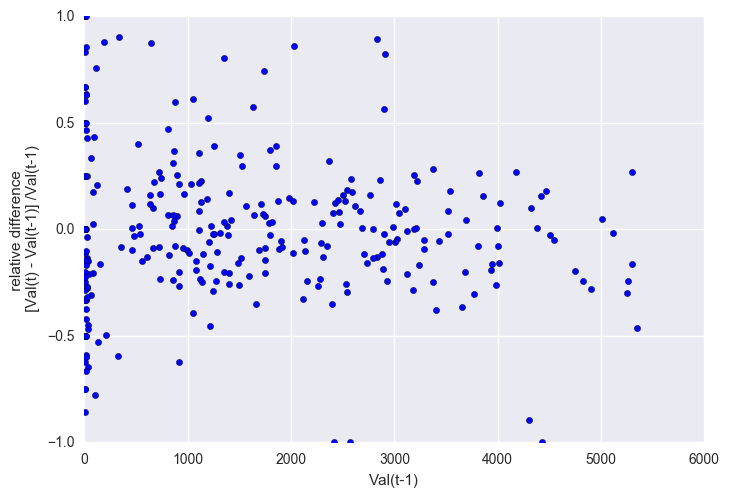

In [138]:
cur_val = DF_ind[DF_ind['Indicator'].str.contains('Number of slides or RDT positive for malaria 5-14 years: Females')]\
.val.drop(0).values[1:]

prev_val = DF_ind[DF_ind['Indicator'].str.contains('Number of slides or RDT positive for malaria 5-14 years: Females')]\
.val.drop(0).shift().values[1:]

plt.scatter(prev_val, (cur_val-prev_val)/prev_val)
#xscale('log')
#yscale('log')
ylim([-1,1])
xlim([-1,6000])
xlabel('Val(t-1)')
ylabel(' relative difference \n [Val(t) - Val(t-1)] /Val(t-1)' )

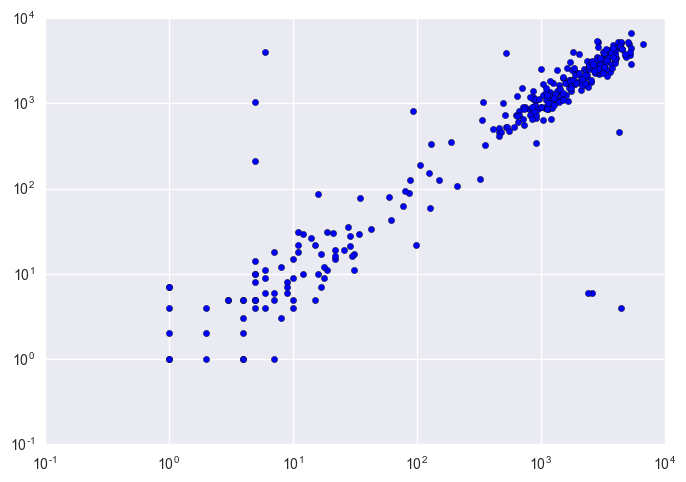